# Libraries and Data Information

## Installations

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create Virtual Environment.

In [2]:
#!python -m venv /content/drive/My Drive/my_env  # Store in your Drive

### Activate Environment

In [3]:
!source /content/drive/My Drive/my_env/bin/activate

/bin/bash: line 1: /content/drive/My: No such file or directory


## Install Packages.

In [4]:
!pip install numpy  # Install or upgrade NumPy first
!pip install scipy==1.10.0 # Install scipy specifically version 1.10.0
!pip install scikit-learn  # Install scikit-learn
!pip install tensorflow  # Install TensorFlow
!pip install torch  # Install PyTorch

In [5]:
!pip install numpy  # Install NumPy first
!pip install numpy.rec # Install numpy.rec specifically.
!pip install scipy==1.10.0 # Reinstall SciPy with the version you need.
#!pip install keras_spiking --upgrade # Install keras_spiking
!pip install keras_spiking # Install keras_spiking

ERROR: Could not find a version that satisfies the requirement numpy.rec (from versions: none)
ERROR: No matching distribution found for numpy.rec


## Libraries

In [6]:
#matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.pyplot as scatter
import matplotlib.cm as cm

import numpy as np
print(f"NumPy version: {np.__version__}")
#import scipy
#print(f"SciPy version: {scipy.__version__}")
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
print(f"Scikit-learn version: {sklearn.__version__}")
# keras/tensorflow imports
import tensorflow as tf
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Flatten, Conv1D
from keras.layers import MaxPooling1D
from keras.models import Sequential
import keras_spiking
import keras
from sklearn.model_selection import GridSearchCV


# warnings imports
import warnings
warnings.filterwarnings("ignore")

# torch imports
import torch
import torch.nn as nn
from torchvision import transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

# spikingjelly imports
#from spikingjelly.clock_driven import neuron, surrogate
#from spikingjelly.clock_driven import accelerating
#import spikingjelly.clock_driven.neuron as sj


# Other imports
from urllib.request import urlretrieve
import collections
import pandas as pd
from math import sqrt
import os
import pickle
from datetime import datetime, timedelta
from google.colab import drive

NumPy version: 1.26.4
Scikit-learn version: 1.6.1
Scikit-learn version: 1.6.1
cpu is available.


# Load Data

In [7]:
from google.colab import files, runtime
data_to_load = files.upload()

Saving AEP_hourly_sorted.csv to AEP_hourly_sorted.csv


# Read and Check Data

## Preprocessing stage.

In [8]:
filename_list = list(data_to_load.keys())
filename = filename_list[0]

In [9]:
df_entire = pd.read_csv(filename)
df_entire.head()

,Datetime,AEP_MW
0,10/1/2004 1:00,12379
1,10/1/2004 2:00,11935
2,10/1/2004 3:00,11692
3,10/1/2004 4:00,11597
4,10/1/2004 5:00,11681


In [10]:
df_entire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [11]:
title_name = 'Hourly Energy Consumption from 2004/12/31 to 2018/01/02'

## Other Pre-Processing Information

In [12]:
# We must convert the Datetime column to Datetime format
df_entire['Datetime'] = pd.to_datetime(df_entire['Datetime'])

# We index the Datetime column after transformation
df_entire.set_index('Datetime', inplace=True)
df_entire.head()

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379
2004-10-01 02:00:00,11935
2004-10-01 03:00:00,11692
2004-10-01 04:00:00,11597
2004-10-01 05:00:00,11681


In [13]:
# checking missing data
df_entire.isna().sum()

,0
AEP_MW,0


In [14]:
# Let's look at the years in the data set
years = df_entire.index.year.unique()
years

Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018],
      dtype='int32', name='Datetime')

## Plot Hourly Energy Consumption (AEP_MW) based on Trends and Seasonality.

In [15]:
def plot_aep_hr(select_df, start, end, seasonality, title_name, feature):
    plt.figure(figsize=(16, 16))
    plt.plot(select_df[start:end], label=feature)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.ylabel(feature, fontsize = 20)
    plt.xlabel("Date", fontsize = 20)
    plt.title("{0} ({1})".format(title_name, seasonality),
              fontsize = 20)
    plt.show()

### Trend Plot

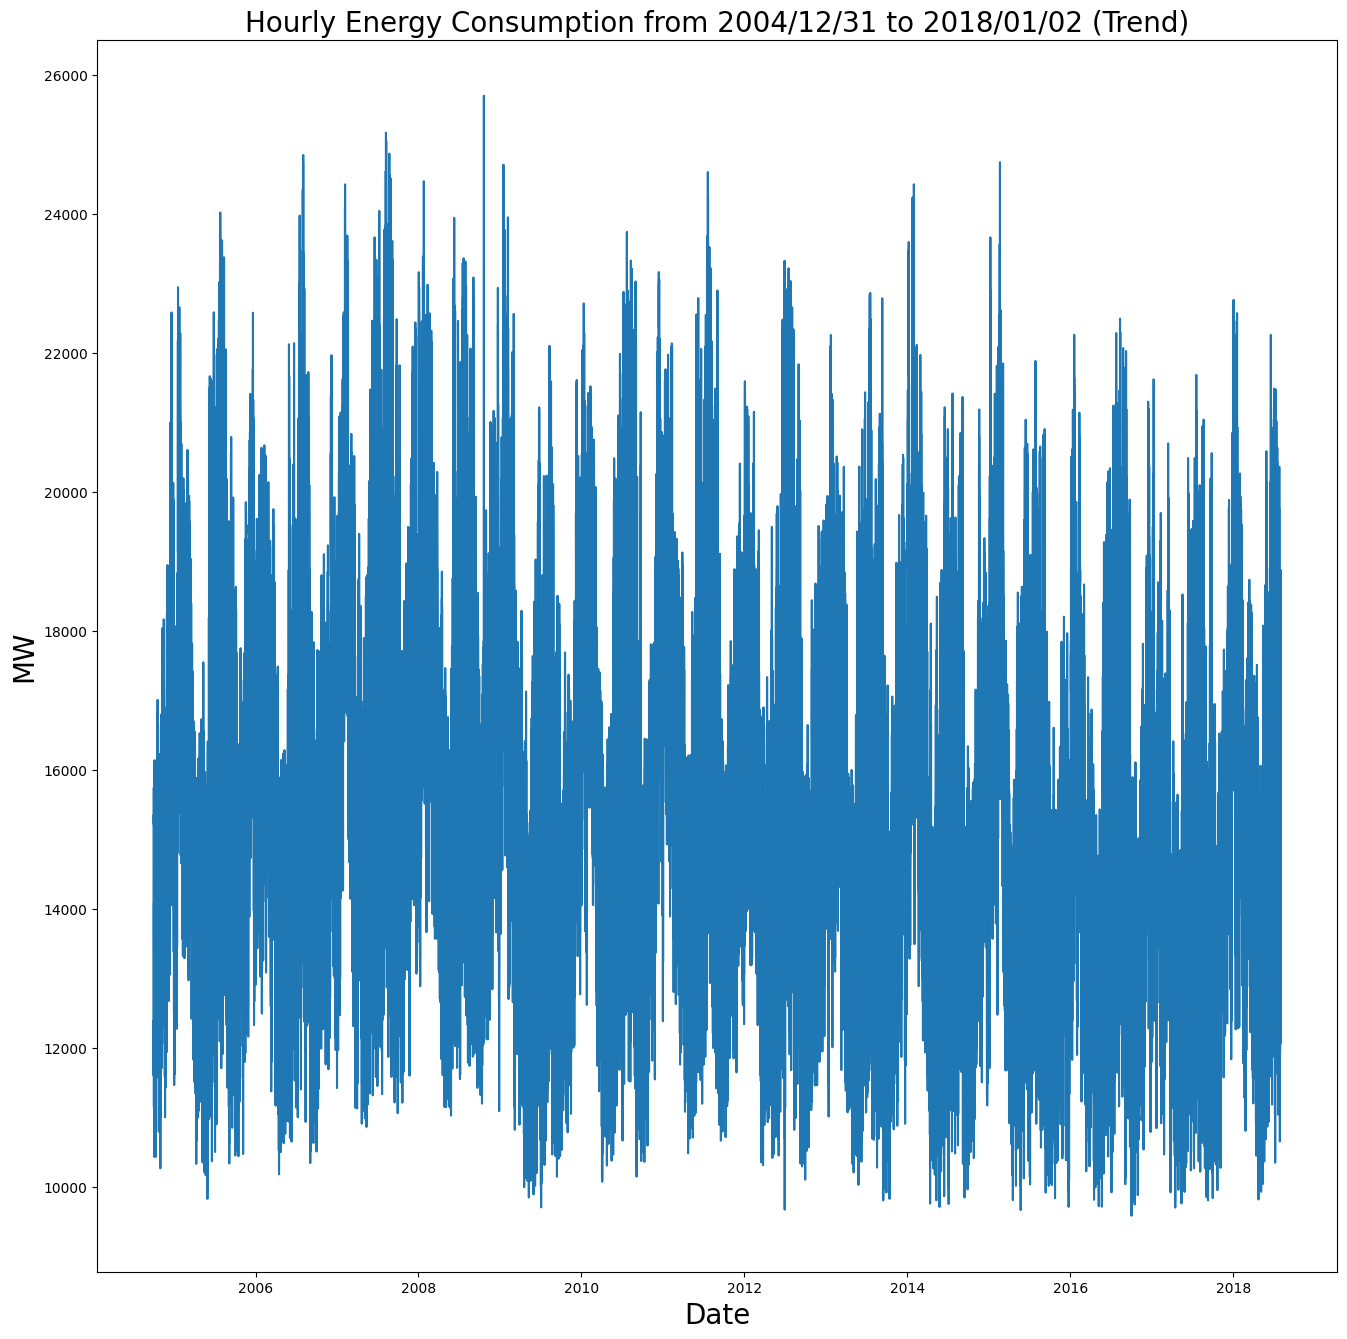

In [16]:
plot_aep_hr(df_entire, 0, df_entire.shape[0]-1, "Trend",
            title_name, 'MW')

### Yearly Plots (Seasonality)

In [17]:
yearly_df = df_entire.query("Datetime >= '2008-01-01' \
                       and Datetime <= '2009-01-01'")
yearly_df

,AEP_MW
Datetime,
2008-01-01 00:00:00,15411
2008-01-01 01:00:00,14755
2008-01-01 02:00:00,14475
2008-01-01 03:00:00,14217
2008-01-01 04:00:00,14149
...,...
2008-12-31 20:00:00,18670
2008-12-31 21:00:00,18319
2008-12-31 22:00:00,17963


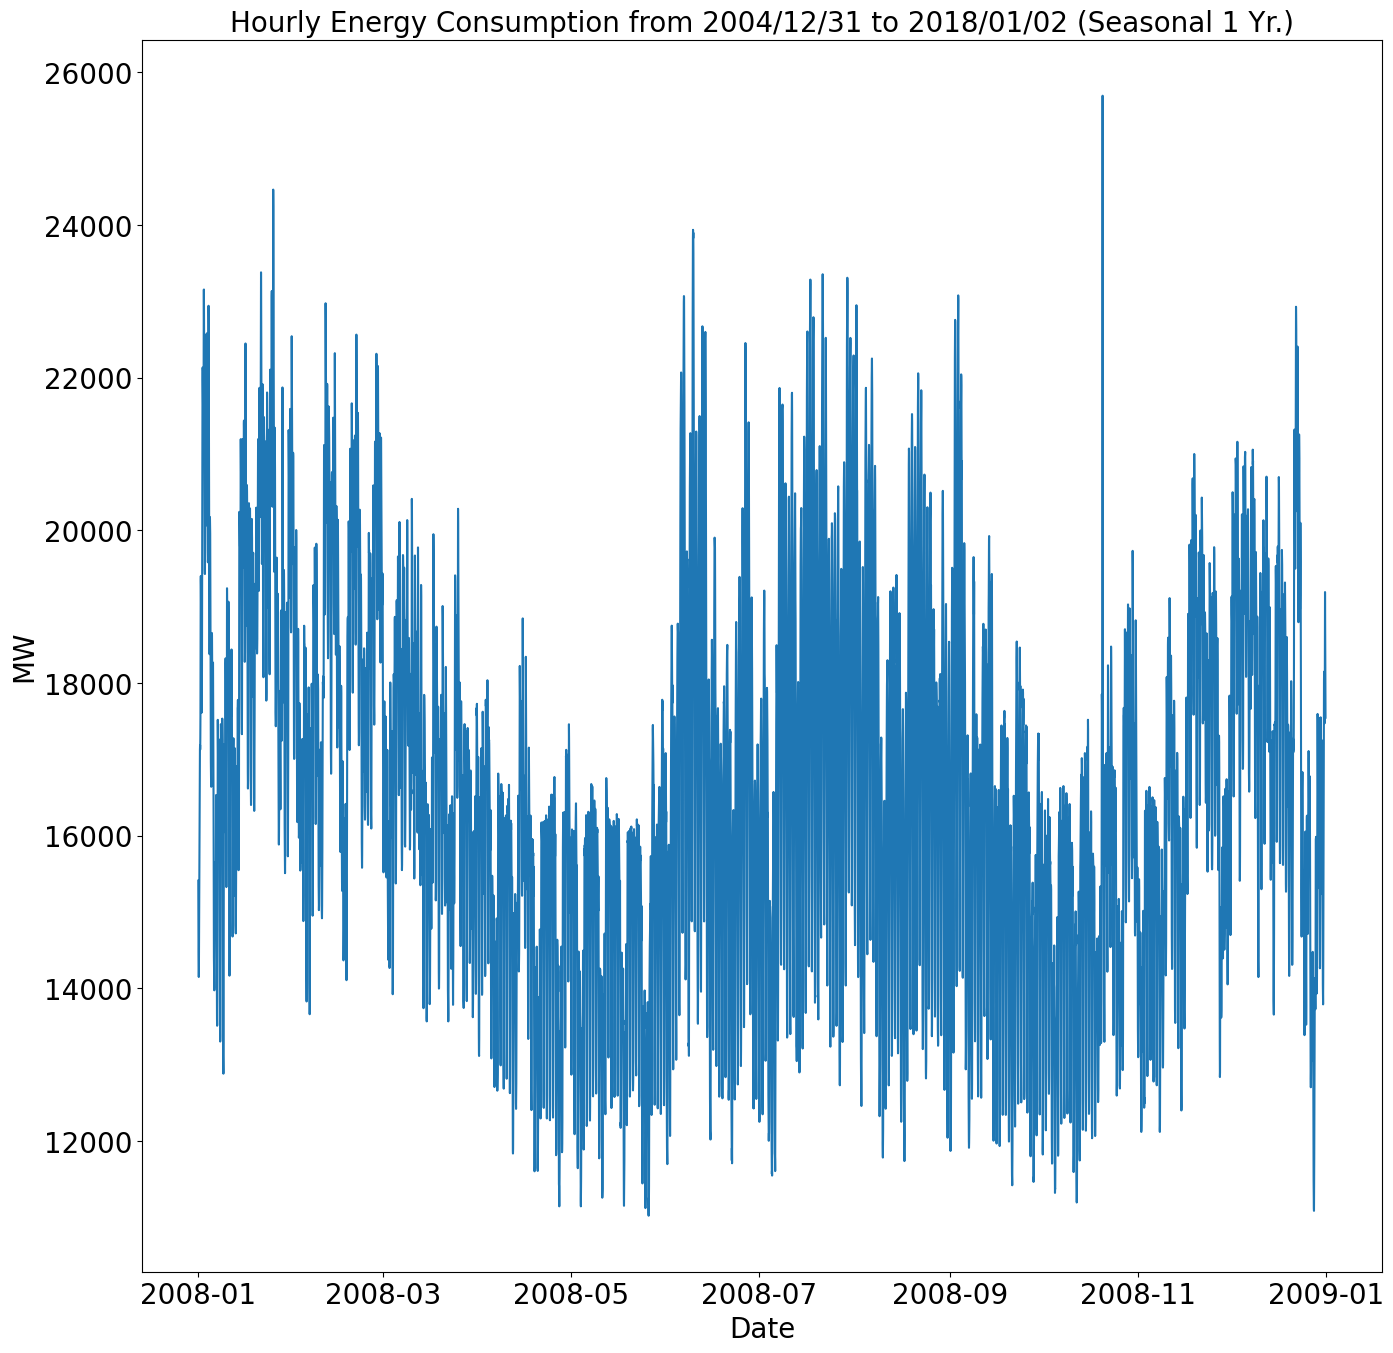

In [18]:
plot_aep_hr(yearly_df, 0, yearly_df.shape[0]-1, "Seasonal 1 Yr.",
                 title_name, 'MW')

### Monthly Plots (Seasonality)

In [19]:
monthly_df = df_entire.query("Datetime >= '2008-05-01' \
                       and Datetime <= '2008-06-01'")

monthly_df

,AEP_MW
Datetime,
2008-05-01 00:00:00,14044
2008-05-01 01:00:00,13230
2008-05-01 02:00:00,12982
2008-05-01 03:00:00,12869
2008-05-01 04:00:00,12878
...,...
2008-05-31 20:00:00,16532
2008-05-31 21:00:00,16178
2008-05-31 22:00:00,16316


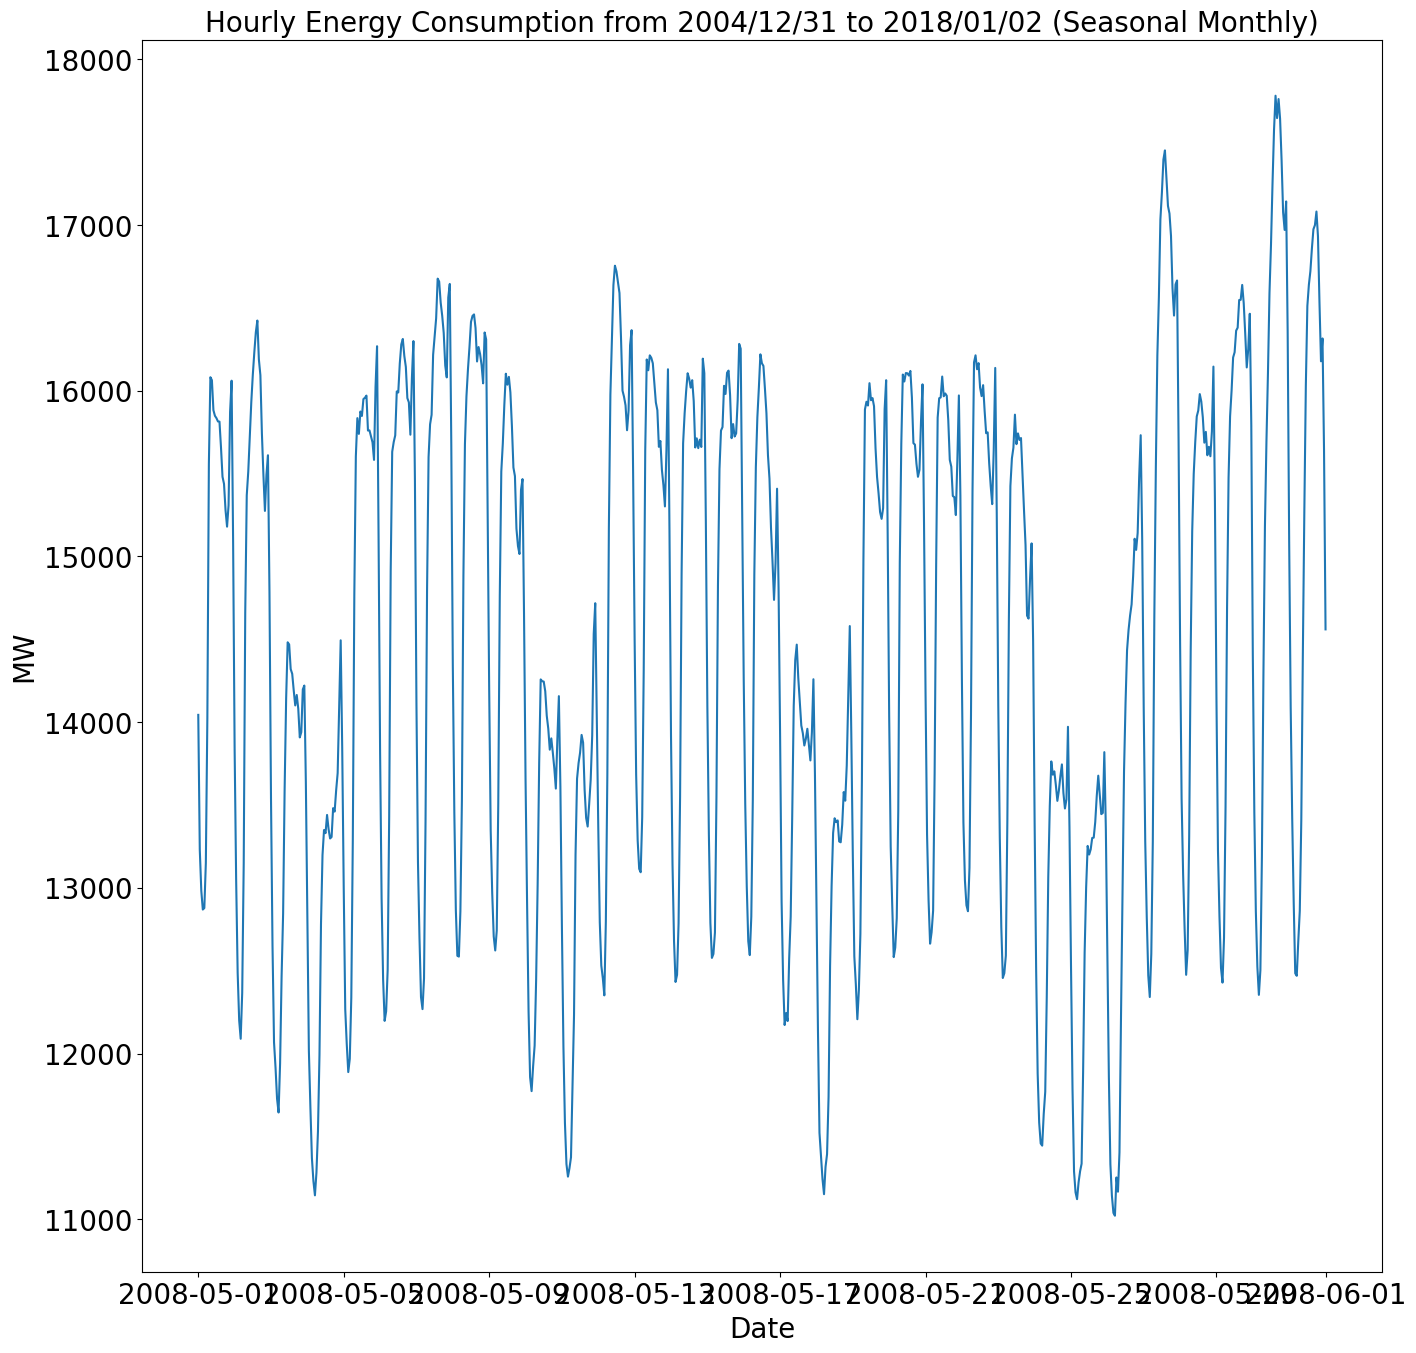

In [20]:
plot_aep_hr(monthly_df, 0, monthly_df.shape[0], "Seasonal Monthly", title_name,
            'MW')

### Weekly Plots (Seasonality)

In [21]:
weekly_df = df_entire.query("Datetime >= '2008-05-04' \
                       and Datetime <= '2008-05-10'")
weekly_df

,AEP_MW
Datetime,
2008-05-04 00:00:00,12816
2008-05-04 01:00:00,12017
2008-05-04 02:00:00,11677
2008-05-04 03:00:00,11369
2008-05-04 04:00:00,11230
...,...
2008-05-09 20:00:00,15015
2008-05-09 21:00:00,15401
2008-05-09 22:00:00,15467


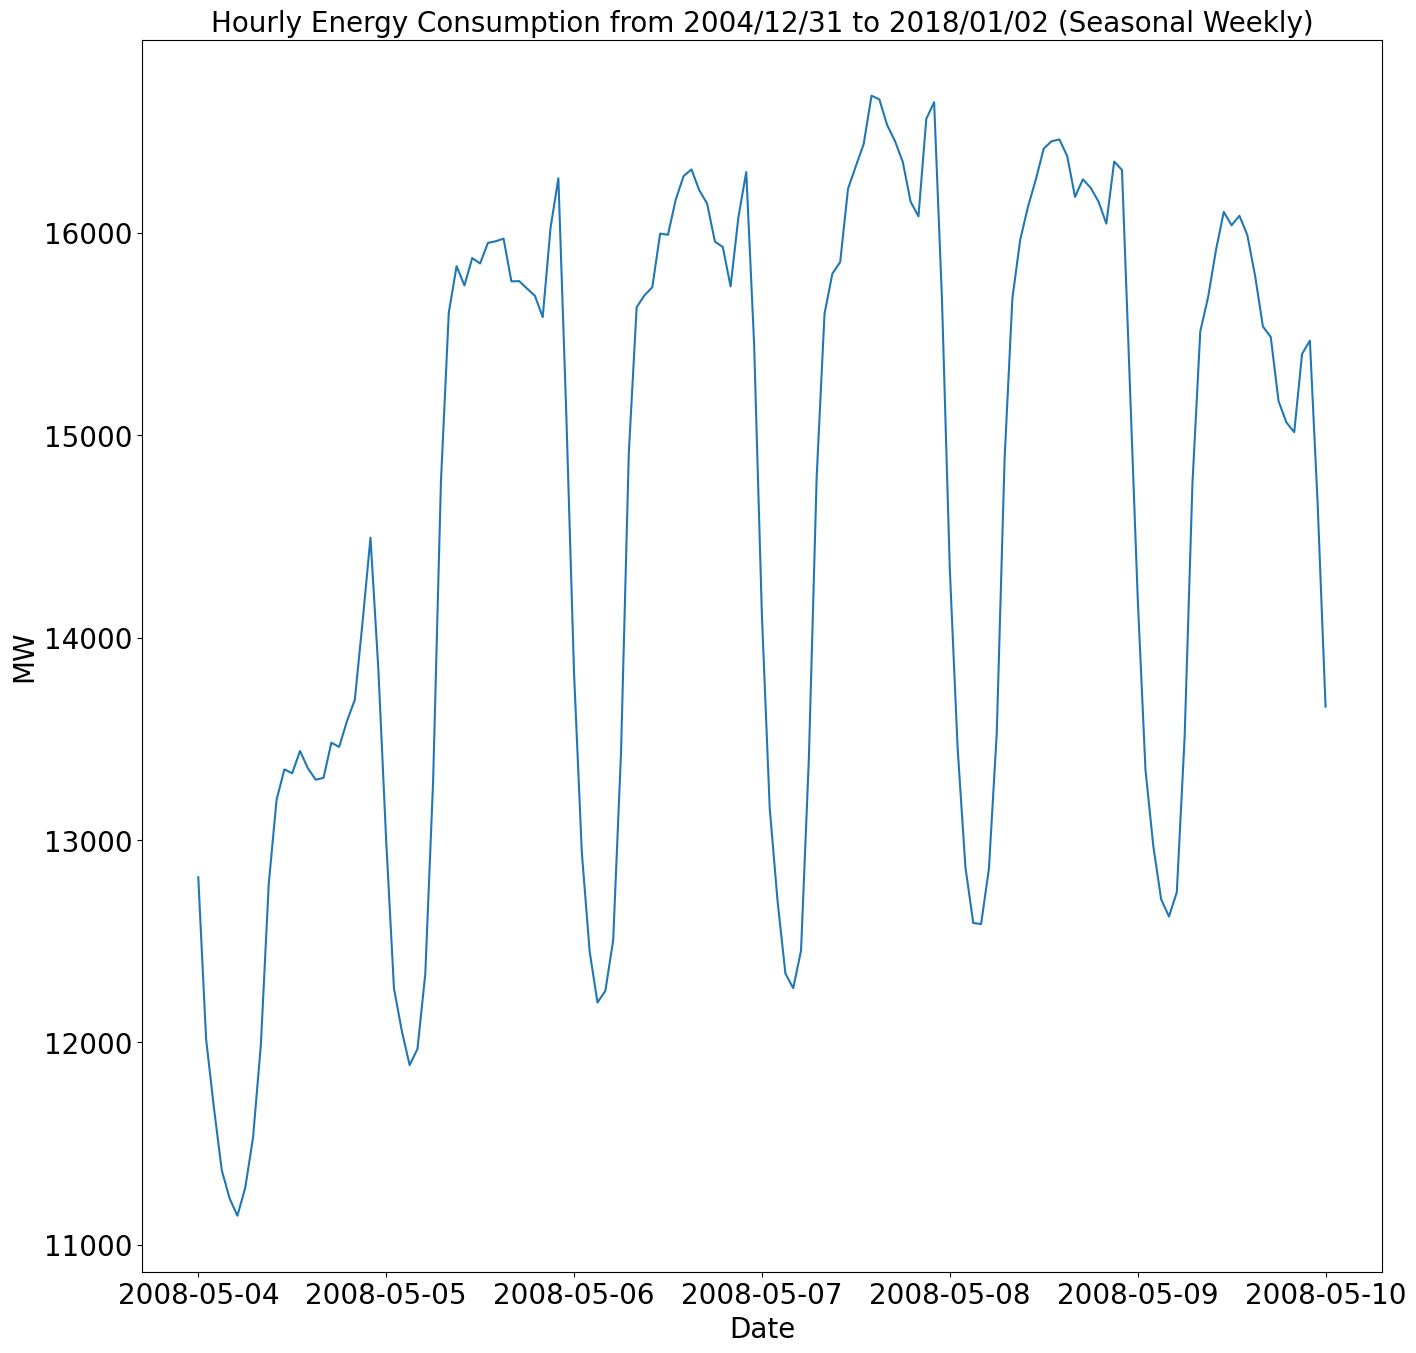

In [22]:
plot_aep_hr(weekly_df, 0, weekly_df.shape[0], "Seasonal Weekly", title_name,
            'MW')

### Daily Plots (Seasonality)

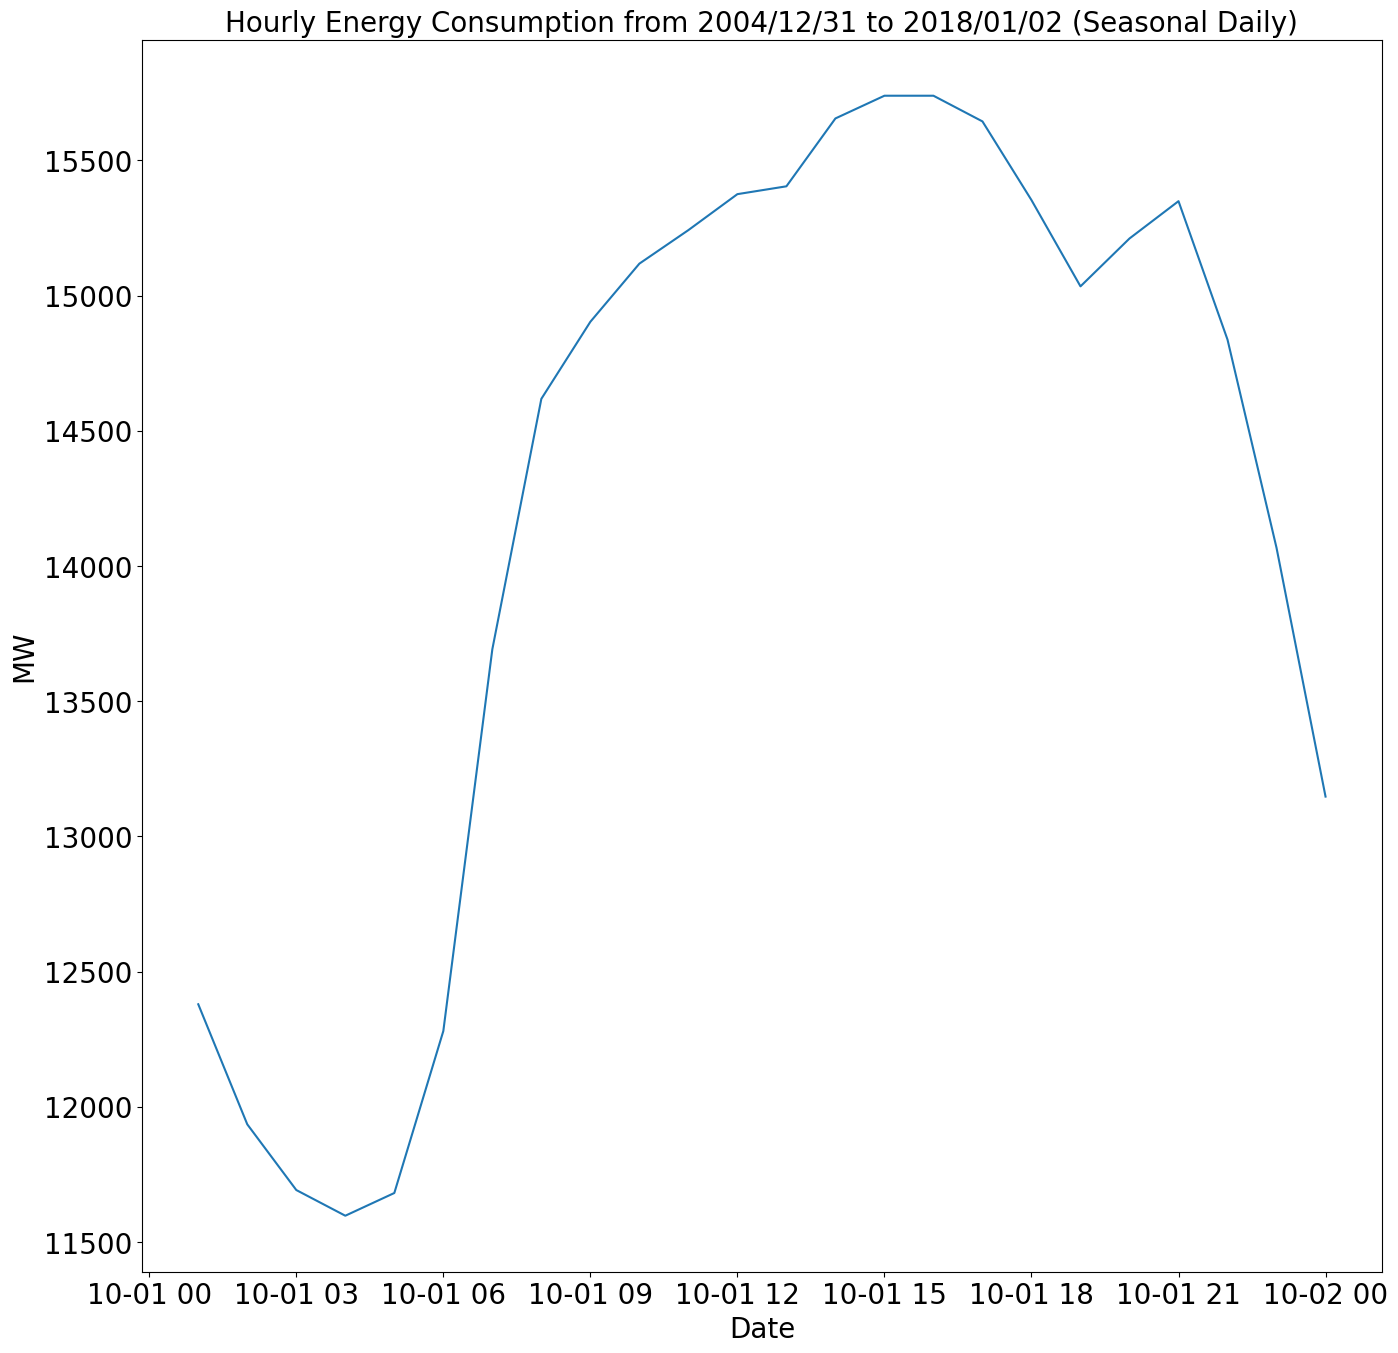

In [23]:
plot_aep_hr(df_entire, 0, 24, "Seasonal Daily", title_name, 'MW')

### Combined Plots

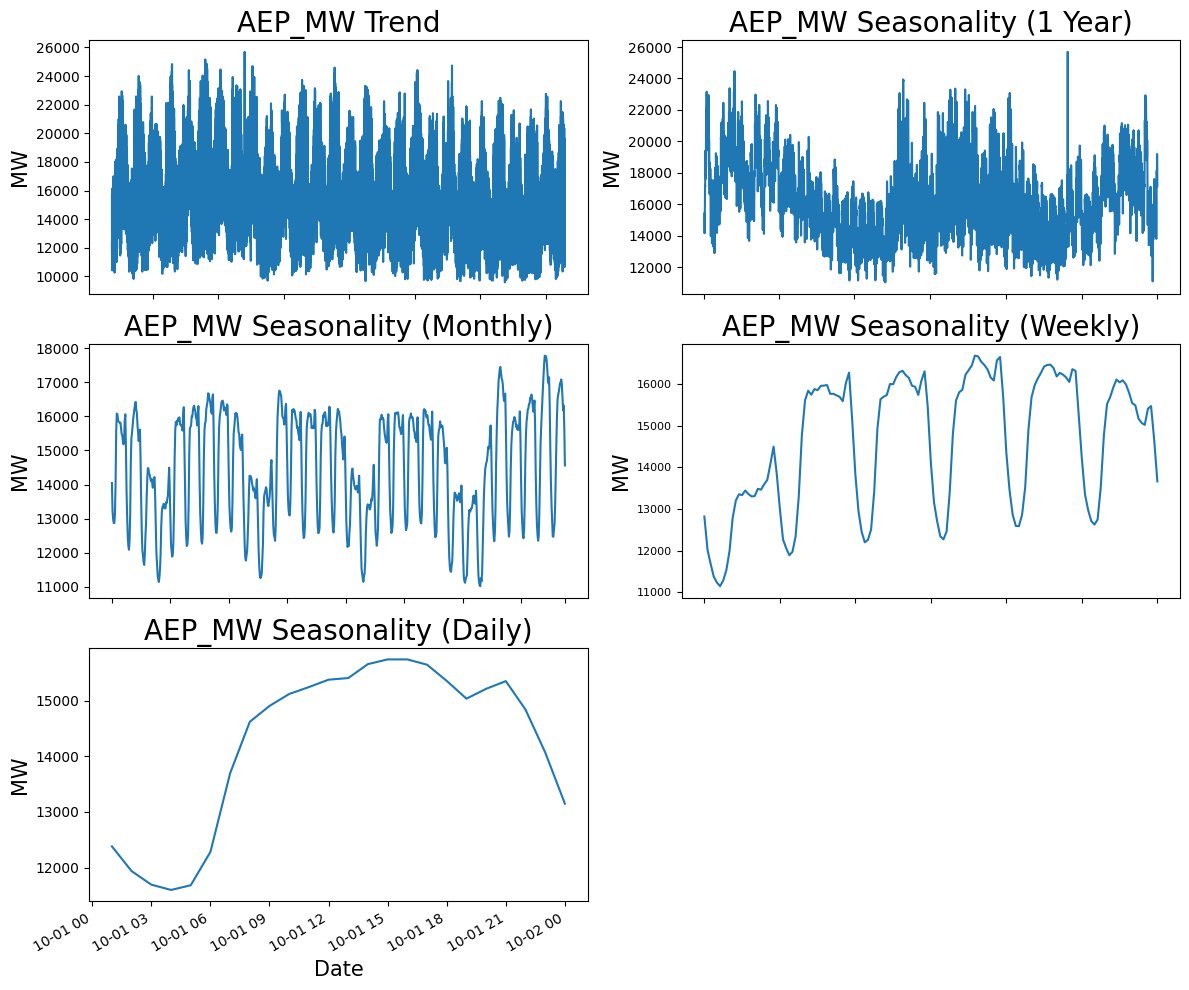

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10)) # 5 rows, 1 column
axes[0, 0].plot(df_entire.index, df_entire['AEP_MW'])
axes[0, 0].set_title('AEP_MW Trend', fontsize = 20)
axes[0, 0].set_ylabel('MW', fontsize = 15)
axes[0, 0].set_xlabel('Date', fontsize = 15)
axes[0, 0].tick_params(axis='y', labelsize=10)   # Adjust y-axis tick label size
axes[0, 0].tick_params(axis='x', labelsize=10)  # Adjust x-axis tick label size
axes[0, 1].plot(yearly_df.index, yearly_df['AEP_MW'])
axes[0, 1].set_title('AEP_MW Seasonality (1 Year)', fontsize = 20)
axes[0, 1].set_ylabel('MW', fontsize = 15)
axes[0, 1].set_xlabel('Date', fontsize = 15)
axes[0, 1].tick_params(axis='x', labelsize=10)  # Adjust x-axis tick label size
axes[0, 1].tick_params(axis='y', labelsize=10)   # Adjust y-axis tick label size
axes[0, 1].set_xlabel('Date', fontsize = 15)
axes[1, 0].plot(monthly_df.index, monthly_df['AEP_MW'])
axes[1, 0].set_title('AEP_MW Seasonality (Monthly)', fontsize = 20)
axes[1, 0].set_ylabel('MW', fontsize = 15)
axes[1, 0].tick_params(axis='y', labelsize=10)   # Adjust y-axis tick label size
axes[1, 0].tick_params(axis='x', labelsize=8)  # Adjust x-axis tick label size
axes[1, 0].set_xlabel('Date', fontsize = 15)
axes[1, 1].plot(weekly_df.index, weekly_df['AEP_MW'])
axes[1, 1].set_title('AEP_MW Seasonality (Weekly)', fontsize = 20)
axes[1, 1].set_ylabel('MW', fontsize = 15)
axes[1, 1].set_xlabel('Date', fontsize = 15)
axes[1, 1].tick_params(axis='x', labelsize=10)  # Adjust x-axis tick label size
axes[1, 1].tick_params(axis='y', labelsize=8)   # Adjust y-axis tick label size
axes[1, 1].set_xlabel('Date', fontsize = 15)
axes[2, 0].plot(df_entire.index[:24], df_entire['AEP_MW'][:24])
axes[2, 0].set_title('AEP_MW Seasonality (Daily)', fontsize = 20)
axes[2, 0].set_ylabel('MW', fontsize = 15)
axes[2, 0].set_xlabel('Date', fontsize = 15)
axes[2, 0].tick_params(axis='y', labelsize=10)   # Adjust y-axis tick label size
axes[2, 0].tick_params(axis='x', labelsize=10)  # Adjust x-axis tick label size
axes[2, 0].set_position([0.35, 0.1, 0.3, 0.25])  # Adjust values for positioning
axes[2, 1].axis('off')
fig.autofmt_xdate()
fig.tight_layout() # Adjusts subplot parameters for a tight layout


# Normalization Process

In [25]:
def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

def normalize_data(df):
    scaler_type = 'minmax'
    #scaler_type = input("Enter a scaler type (minmax,standard, maxabs, robust): ")
    if (scaler_type != 'minmax') and (scaler_type != 'standard') and (scaler_type != 'maxabs') and (scaler_type != 'robust'):
      runtime.unassign()

    scaler = get_scaler(scaler_type)
    normalized_data_MMT = scaler.fit_transform(df['AEP_MW'].
                                               values.reshape(-1,1))
    df['AEP_MW_Norm'] = normalized_data_MMT
    return df, scaler

df_norm, scaler = normalize_data(df_entire)
df_norm_yr, scaler_yr = normalize_data(yearly_df)
df_norm_mon, scaler_mon = normalize_data(monthly_df)
df_norm_wk, scaler = normalize_data(weekly_df)

In [26]:
df_norm

,AEP_MW,AEP_MW_Norm
Datetime,,
2004-10-01 01:00:00,12379,0.173638
2004-10-01 02:00:00,11935,0.146084
2004-10-01 03:00:00,11692,0.131004
2004-10-01 04:00:00,11597,0.125109
2004-10-01 05:00:00,11681,0.130321
...,...,...
2018-08-02 20:00:00,17673,0.502172
2018-08-02 21:00:00,17303,0.479211
2018-08-02 22:00:00,17001,0.460469


In [27]:
df_norm_yr

,AEP_MW,AEP_MW_Norm
Datetime,,
2008-01-01 00:00:00,15411,0.299169
2008-01-01 01:00:00,14755,0.254464
2008-01-01 02:00:00,14475,0.235382
2008-01-01 03:00:00,14217,0.217800
2008-01-01 04:00:00,14149,0.213166
...,...,...
2008-12-31 20:00:00,18670,0.521262
2008-12-31 21:00:00,18319,0.497342
2008-12-31 22:00:00,17963,0.473082


In [28]:
df_norm_mon

,AEP_MW,AEP_MW_Norm
Datetime,,
2008-05-01 00:00:00,14044,0.447189
2008-05-01 01:00:00,13230,0.326775
2008-05-01 02:00:00,12982,0.290089
2008-05-01 03:00:00,12869,0.273373
2008-05-01 04:00:00,12878,0.274704
...,...,...
2008-05-31 20:00:00,16532,0.815237
2008-05-31 21:00:00,16178,0.762870
2008-05-31 22:00:00,16316,0.783284


In [29]:
df_norm_wk

,AEP_MW,AEP_MW_Norm
Datetime,,
2008-05-04 00:00:00,12816,0.302187
2008-05-04 01:00:00,12017,0.157781
2008-05-04 02:00:00,11677,0.096331
2008-05-04 03:00:00,11369,0.040665
2008-05-04 04:00:00,11230,0.015543
...,...,...
2008-05-09 20:00:00,15015,0.699620
2008-05-09 21:00:00,15401,0.769384
2008-05-09 22:00:00,15467,0.781312


# Let's observe train and test data on the graph

## Split into Train/Test Data.

In [30]:
test_size = 0.2 # Set Split rate to 4:1 (80 % Training 20 % Test).
split_pos = int(df_entire.shape[0]*(1 - test_size))
df_entire = df_entire.reset_index()
df_entire

,Datetime,AEP_MW,AEP_MW_Norm
0,2004-10-01 01:00:00,12379,0.173638
1,2004-10-01 02:00:00,11935,0.146084
2,2004-10-01 03:00:00,11692,0.131004
3,2004-10-01 04:00:00,11597,0.125109
4,2004-10-01 05:00:00,11681,0.130321
...,...,...,...
121268,2018-08-02 20:00:00,17673,0.502172
121269,2018-08-02 21:00:00,17303,0.479211
121270,2018-08-02 22:00:00,17001,0.460469
121271,2018-08-02 23:00:00,15964,0.396115


In [31]:
# 2019-02-06 will be the date seperation. Dates past this will be the test set.
split_date = str(df_entire.Datetime[split_pos])
#split_date = split_date[:10]
#DOM_train = df_norm.loc[df_norm.index <= split_date].copy()
DOM_train = df_entire.loc[df_norm.index <= split_date].copy()
#DOM_test = df_norm.loc[df_norm.index > split_date].copy()
DOM_test = df_entire.loc[df_norm.index > split_date].copy()
split_date

'2015-10-27 10:00:00'

## Plot Train/Test Split Graphs.

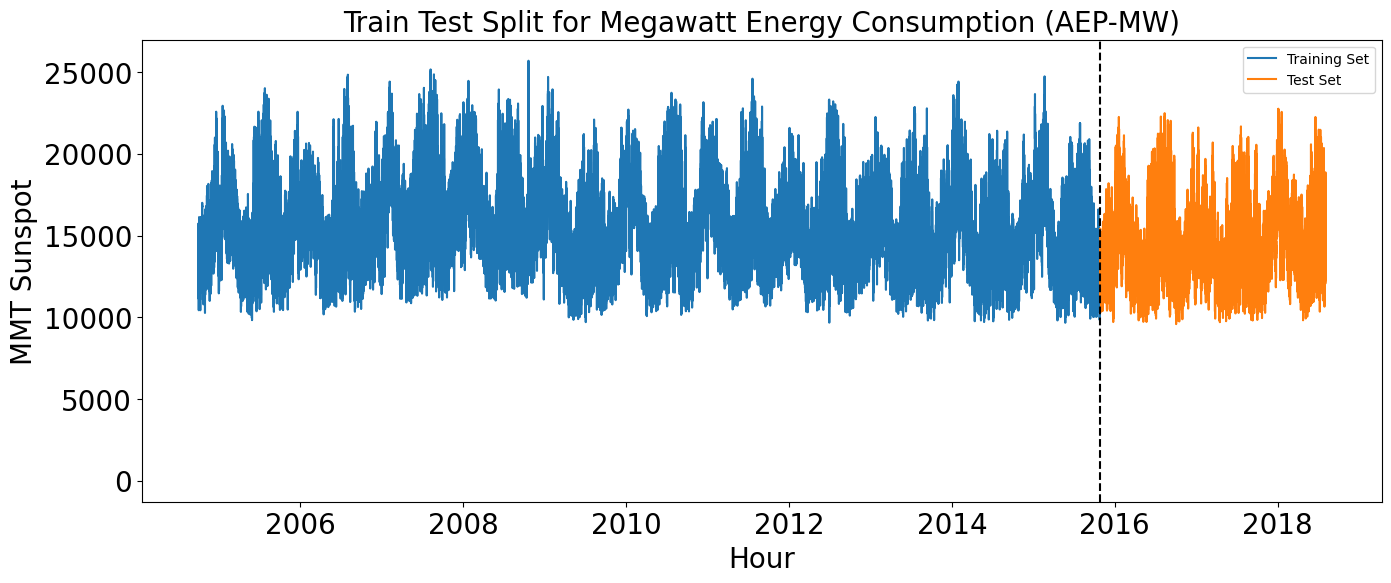

In [32]:
# Monthly Mean Total Sunspot Number Train Test Split
plt.figure(figsize=(16,6))
plt.plot(DOM_train['Datetime'], DOM_train['AEP_MW'],
         label='Training Set (Vehicle Miles)')
plt.plot(DOM_test['Datetime'], DOM_test['AEP_MW'],
         label='Testing Set (Vehicle Miles)')
plt.axvline(x = df_entire.Datetime[split_pos], color='black', ls='--')
plt.legend(['Training Set', 'Test Set'])
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("MMT Sunspot", fontsize = 20)
plt.title("Train Test Split for Megawatt Energy Consumption (AEP-MW)",
          fontsize = 20)
plt.show()

In [33]:
# We index the Datetime column after transformation
df_entire.set_index('Datetime', inplace=True)
df_entire.head()

,AEP_MW,AEP_MW_Norm
Datetime,,
2004-10-01 01:00:00,12379,0.173638
2004-10-01 02:00:00,11935,0.146084
2004-10-01 03:00:00,11692,0.131004
2004-10-01 04:00:00,11597,0.125109
2004-10-01 05:00:00,11681,0.130321


In [34]:
df_entire1 = df_entire.drop(columns = ['AEP_MW_Norm'])
df_entire1

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379
2004-10-01 02:00:00,11935
2004-10-01 03:00:00,11692
2004-10-01 04:00:00,11597
2004-10-01 05:00:00,11681
...,...
2018-08-02 20:00:00,17673
2018-08-02 21:00:00,17303
2018-08-02 22:00:00,17001


In [35]:
df_entire2 = df_entire.drop(columns = ['AEP_MW'])
df_entire2

,AEP_MW_Norm
Datetime,
2004-10-01 01:00:00,0.173638
2004-10-01 02:00:00,0.146084
2004-10-01 03:00:00,0.131004
2004-10-01 04:00:00,0.125109
2004-10-01 05:00:00,0.130321
...,...
2018-08-02 20:00:00,0.502172
2018-08-02 21:00:00,0.479211
2018-08-02 22:00:00,0.460469


# Prepare Data for Training the Models.

* With the following function block, let's set our data set as training and test data set in a model appropriate way

In [36]:
def load_data(data, seq_len):
    X_train = []
    y_train = []

    for i in range(seq_len, len(data)):
        X_train.append(data.iloc[i-seq_len : i, 0])
        y_train.append(data.iloc[i, 0])

    # last days are going to be used in test
    X_test = X_train[split_pos:]
    y_test = y_train[split_pos:]

    # first  days are going to be used in training
    X_train = X_train[:split_pos]
    y_train = y_train[:split_pos]

    # convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # reshape data to input into LSTM, SNN, and Hybrid DNN Models.
    X_train = np.reshape(X_train, (split_pos, seq_len, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

    return [X_train, y_train, X_test, y_test]

* **The seq_len** parameter determines how far back the model will look at historical data, helping the model to capture time dependencies in a memory-aware way.
* We should note that if "seq_len" is too large, the model can become complex and prone to overlearning.
* We can specify separate seq_len values for LSTM, SNN, and CNN-LSTM

In [37]:
feature = 'Hourly Energy Consumption'
#selected_df = df_entire1
selected_df = df_entire2
feature_norm = 'Energy Consumption (Norm)'
feature_field = 'Energy Consumption'

In [38]:
seq_len = 20
#seq_len = 6*24*30

# Let's create train, test data
#X_train, y_train, X_test, y_test = load_data(df_vht, seq_len)
#X_train, y_train, X_test, y_test = load_data(df_vmt, seq_len)
X_train, y_train, X_test, y_test = load_data(selected_df, seq_len)
#X_train, y_train, X_test, y_test = load_data(df_norm2, seq_len)


print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (97018, 20, 1)
y_train.shape =  (97018,)
X_test.shape =  (24235, 20, 1)
y_test.shape =  (24235,)


In [39]:
X_train

array([[[0.17363783],
        [0.14608415],
        [0.1310041 ],
        ...,
        [0.35819784],
        [0.33840139],
        [0.34938563]],

       [[0.14608415],
        [0.1310041 ],
        [0.1251086 ],
        ...,
        [0.33840139],
        [0.34938563],
        [0.35794961]],

       [[0.1310041 ],
        [0.1251086 ],
        [0.13032146],
        ...,
        [0.34938563],
        [0.35794961],
        [0.326176  ]],

       ...,

       [[0.27621944],
        [0.32803773],
        [0.326176  ],
        ...,
        [0.20404617],
        [0.16842497],
        [0.1520417 ]],

       [[0.32803773],
        [0.326176  ],
        [0.34541393],
        ...,
        [0.16842497],
        [0.1520417 ],
        [0.13478962]],

       [[0.326176  ],
        [0.34541393],
        [0.32363162],
        ...,
        [0.1520417 ],
        [0.13478962],
        [0.12566712]]])

In [40]:
X_test

array([[[0.34541393],
        [0.32363162],
        [0.31879111],
        ...,
        [0.13478962],
        [0.12566712],
        [0.14205039]],

       [[0.32363162],
        [0.31879111],
        [0.31699144],
        ...,
        [0.12566712],
        [0.14205039],
        [0.18052625]],

       [[0.31879111],
        [0.31699144],
        [0.31202681],
        ...,
        [0.14205039],
        [0.18052625],
        [0.25915353]],

       ...,

       [[0.18654586],
        [0.16848703],
        [0.15377932],
        ...,
        [0.52978776],
        [0.50217202],
        [0.47921062]],

       [[0.16848703],
        [0.15377932],
        [0.16401887],
        ...,
        [0.50217202],
        [0.47921062],
        [0.46046916]],

       [[0.15377932],
        [0.16401887],
        [0.19858508],
        ...,
        [0.47921062],
        [0.46046916],
        [0.39611518]]])

In [41]:
y_train

array([0.35794961, 0.326176  , 0.27839146, ..., 0.13478962, 0.12566712,
       0.14205039])

In [42]:
y_test

array([0.18052625, 0.25915353, 0.30817922, ..., 0.46046916, 0.39611518,
       0.32443838])

## Essential Variables.

In [43]:
epochs = 50
batch_size = 1000
#loss = 'MAE'
loss = 'MSE'
#activation = 'sigmoid'
activation = 'tanh'
#activation = 'relu'

## Training Loss vs. Epochs Plot

Plotting Accuracy and Validation Accuracy vs Epochs. Code taken from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/.

In [44]:
def plot_training_loss(model, model_name):
    model.history.keys()
    plt.plot(model.history['loss'])
    plt.title('Training Loss vs. Epochs for {0}'.format(model_name))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

# LSTM model

## Create LSTM Model.

In [45]:
lstm_model = Sequential()

#lstm_model.add(LSTM(6,activation="relu",return_sequences=True,
#                    input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(32,activation="tanh",return_sequences=True,
                    input_shape=(100,1)))
lstm_model.add(Dropout(0.5))

#lstm_model.add(LSTM(32,activation="sigmoid",return_sequences=True))
#lstm_model.add(Dropout(0.5))

lstm_model.add(LSTM(60,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 32)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60)             │        22,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,733 (104.43 KB)

 Trainable params: 26,733 (104.43 KB)

 Non-trainable params: 0 (0.00 B)

## Train LSTM Model

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 217ms/step - loss: 0.0356
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step - loss: 0.0143
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - loss: 0.0088
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - loss: 0.0070
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - loss: 0.0053
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - loss: 0.0044
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - loss: 0.0037
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 202ms/step - loss: 0.0033
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - loss: 0.0031
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - loss: 0.0027
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - loss: 0.0026
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - loss: 0.0025
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - loss: 0.0021
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - loss: 0.0021
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 

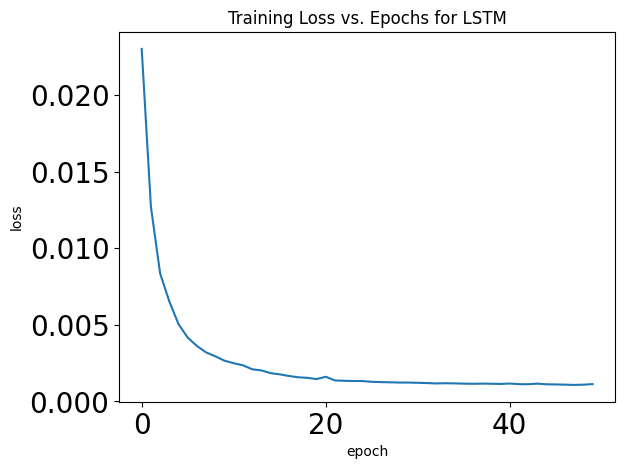

In [46]:
lstm_model.compile(optimizer="adam",loss=loss)
lstm_model_epochs = lstm_model.fit(X_train, y_train, epochs=epochs,
                           batch_size=batch_size)
plot_training_loss(lstm_model_epochs, "LSTM")

## Evaluate LSTM Model using MAE, RMSE, and R2.

In [47]:
print("LSTM Predictions for Training Set")
lstm_predictions_train = lstm_model.predict(X_train)
print("LSTM Predictions for Testing Set")
lstm_predictions_test = lstm_model.predict(X_test)
lstm_mae = mean_absolute_error(y_test,lstm_predictions_test)
print("MAE of LSTM model = ",lstm_mae)
lstm_rmse =  mean_squared_error(y_test, lstm_predictions_test) ** 0.5
print("RMSE of LSTM model = ", lstm_rmse)
#rnn_r2_score = r2_score(y_test,rnn_predictions_test)
#print("R2 Score of LSTM model = ",rnn_r2_score)
lstm_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                    lstm_predictions_test)
print("MAPE Score of LSTM model = {0} %".format(lstm_mape_score))

LSTM Predictions for Training Set
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step
LSTM Predictions for Testing Set
758/758 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
MAE of LSTM model =  0.013858396596851862
RMSE of LSTM model =  0.017841590184486875
MAPE Score of LSTM model = 552787079883.5581 %


## Reverse Transform Scaler to Convert to Real Values.

In [48]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
lstm_predictions_inv_train = scaler.inverse_transform(lstm_predictions_train)

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_inv_test = scaler.inverse_transform(lstm_predictions_test)

# Get values after inverse transformation
y_train_inverse = y_train_inverse.flatten()
lstm_predictions_inv_train = lstm_predictions_inv_train.flatten()

y_test_inverse = y_test_inverse.flatten()
lstm_predictions_inv_test = lstm_predictions_inv_test.flatten()

## Show Actual and Predicted y values as Dataframes.

### With Training Dates.

In [49]:
first_6169_index_dates = df_entire.index[:X_train.shape[0]]
results_LSTM_train = pd.DataFrame({"Date": first_6169_index_dates,
                                  'Actual': y_train_inverse,
                                  'Predicted': lstm_predictions_inv_train})
results_LSTM_train

,Date,Actual,Predicted
0,2004-10-01 01:00:00,13124.535187,13022.289062
1,2004-10-01 02:00:00,12948.731786,13009.409180
2,2004-10-01 03:00:00,12684.339953,12730.155273
3,2004-10-01 04:00:00,12368.443217,12472.243164
4,2004-10-01 05:00:00,12063.877560,12162.102539
...,...,...,...
97013,2015-10-27 05:00:00,12075.895370,12057.289062
97014,2015-10-27 06:00:00,11985.246742,11958.135742
97015,2015-10-27 07:00:00,11889.790989,11991.193359
97016,2015-10-27 08:00:00,11839.316185,11968.782227


### With Testing Dates.

In [50]:
last_6169_index_dates = df_entire.index[-X_test.shape[0]:]
results_LSTM_test = pd.DataFrame({"Date":last_6169_index_dates,
                                 'Actual': y_test_inverse,
                                 'Predicted': lstm_predictions_inv_test})
results_LSTM_test

,Date,Actual,Predicted
0,2015-10-28 06:00:00,12142.851744,12152.676758
1,2015-10-28 07:00:00,12577.896488,12395.408203
2,2015-10-28 08:00:00,12849.155641,12866.895508
3,2015-10-28 09:00:00,12862.203550,13019.971680
4,2015-10-28 10:00:00,12838.511295,12880.341797
...,...,...,...
24230,2018-08-02 20:00:00,13922.517811,13828.404297
24231,2018-08-02 21:00:00,13795.472384,13642.876953
24232,2018-08-02 22:00:00,13691.775847,13513.394531
24233,2018-08-02 23:00:00,13335.705287,13427.086914


## Plotting Predictions for AEP_MW made by LSTM Model.

### Only Testing Data.

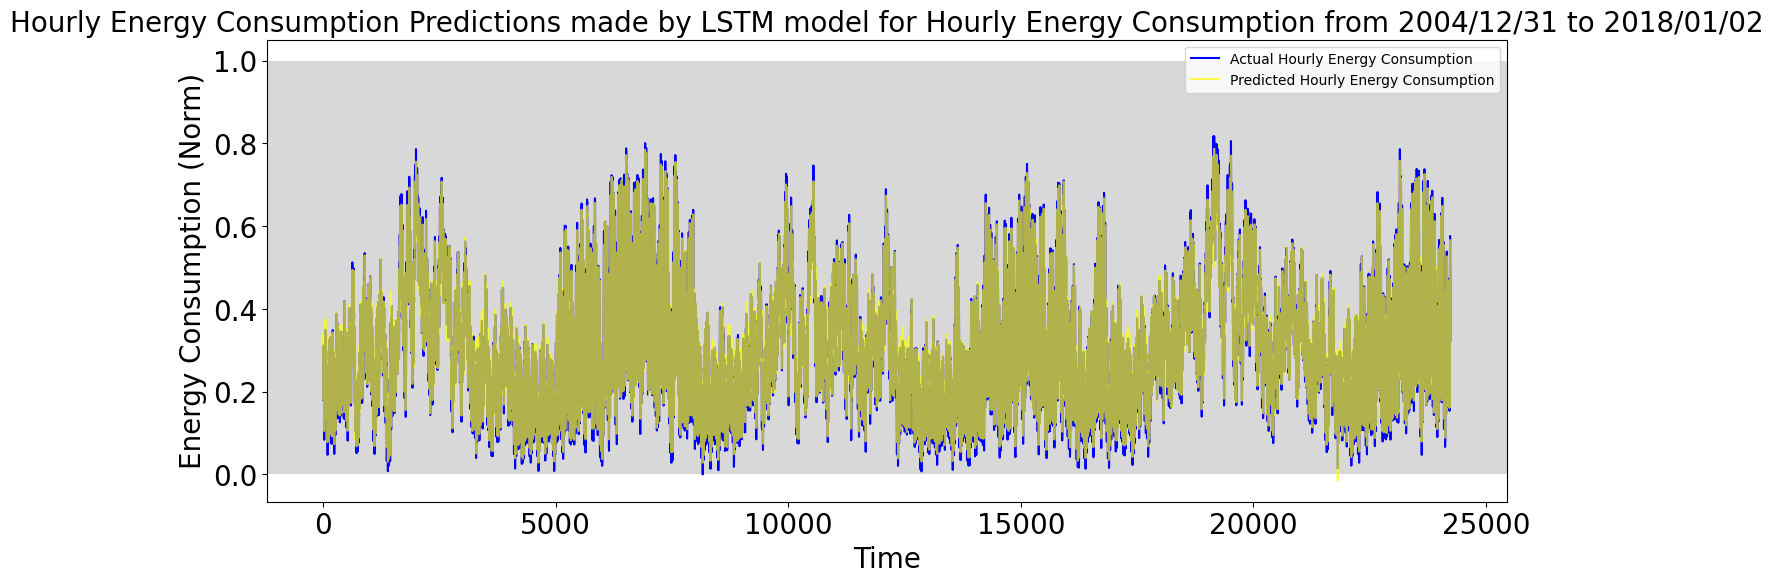

In [51]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue',label='Actual {0}'.format(feature))
plt.plot(lstm_predictions_test, alpha=0.7, color='yellow',
         label='Predicted {0}'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

### Training and Testing Data combined.

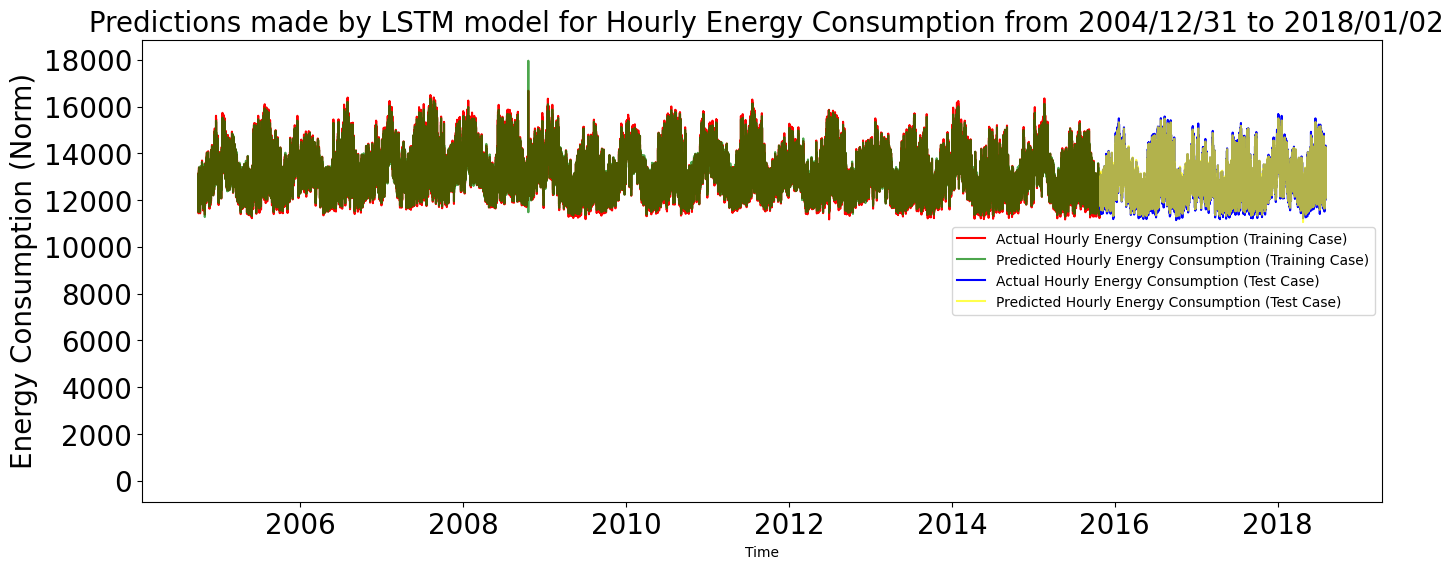

In [52]:
plt.figure(figsize=(16,6))
plt.plot(results_LSTM_train['Date'], results_LSTM_train['Actual'], color='red',
         label='Actual {0} (Training Case)'.format(feature))
plt.plot(results_LSTM_train['Date'], results_LSTM_train['Predicted'], alpha=0.7,
         color='green', label='Predicted {0} (Training Case)'.format(feature))
plt.plot(results_LSTM_test['Date'], results_LSTM_test['Actual'], color='blue',
         label='Actual {0} (Test Case)'.format(feature))
plt.plot(results_LSTM_test['Date'], results_LSTM_test['Predicted'], alpha=0.7,
         color='yellow', label='Predicted {0} (Test Case)'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title(" Predictions made by LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.xlabel('Time', fontsize = 10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

## Combine Actual and Predicted Results for Train and Test Cases for LSTM.

In [53]:
results_LSTM = [results_LSTM_train, results_LSTM_test]
results_LSTM = pd.concat(results_LSTM)
display(results_LSTM)

,Date,Actual,Predicted
0,2004-10-01 01:00:00,13124.535187,13022.289062
1,2004-10-01 02:00:00,12948.731786,13009.409180
2,2004-10-01 03:00:00,12684.339953,12730.155273
3,2004-10-01 04:00:00,12368.443217,12472.243164
4,2004-10-01 05:00:00,12063.877560,12162.102539
...,...,...,...
24230,2018-08-02 20:00:00,13922.517811,13828.404297
24231,2018-08-02 21:00:00,13795.472384,13642.876953
24232,2018-08-02 22:00:00,13691.775847,13513.394531
24233,2018-08-02 23:00:00,13335.705287,13427.086914


## Plotting Residuals for Actual and Predicted Results for LSTM.

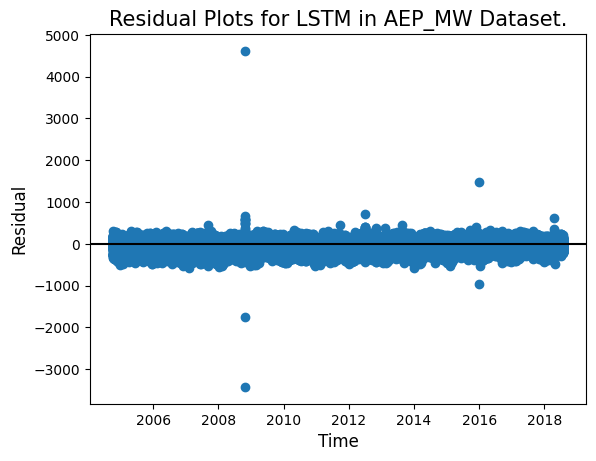

In [54]:
actual_arr_LSTM = np.array(results_LSTM['Actual'])
predicted_arr_LSTM = np.array(results_LSTM['Predicted'])
residuals_LSTM = predicted_arr_LSTM - actual_arr_LSTM
plt.scatter(results_LSTM['Date'], residuals_LSTM)
plt.axhline(y=0, color = 'black')
plt.title("Residual Plots for LSTM in AEP_MW Dataset.",
          fontsize = 15),
#plt.locator_params(axis='x', nbins=10)
#plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Residual", fontsize = 12)
plt.show()

# SNN Model.

## Create SNN Model.

### Spiking Activation Layer

In [55]:
class SpikingActivationCell(tf.keras.layers.Layer):
    def __init__(self, activation='tanh', threshold=1.0, dt=1.0, spiking_aware_training=False, **kwargs):
        super(SpikingActivationCell, self).__init__(**kwargs)
        self.activation = activation
        self.threshold = threshold
        self.dt = dt
        self.spiking_aware_training = spiking_aware_training
        self.state_size = 1  # State to store membrane potential

    def build(self, input_shape):
        self.membrane_potential = self.add_weight(
            name='membrane_potential',
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=False
        )
        super(SpikingActivationCell, self).build(input_shape)

    def call(self, inputs, states, training=None):
        prev_membrane_potential = states[0]

        # Apply activation function
        activated_input = tf.keras.activations.get(self.activation)(inputs)

        # Update membrane potential
        membrane_potential = prev_membrane_potential + activated_input * self.dt

        # Generate spikes based on threshold
        if training and self.spiking_aware_training:
            # Use a surrogate gradient during training
            # This is a common surrogate gradient (Heaviside step function with identity gradient)
            spikes = tf.where(membrane_potential >= self.threshold,
                              tf.ones_like(membrane_potential),
                              tf.zeros_like(membrane_potential))
            # Define the surrogate gradient
            @tf.custom_gradient
            def surrogate_spike(x):
                spike = tf.where(x >= self.threshold, tf.ones_like(x), tf.zeros_like(x))
                def grad(dy):
                    # Here we use an identity gradient for simplicity, you might use others
                    return dy
                return spike, grad
            spikes = surrogate_spike(membrane_potential)
        else:
            # Use standard spiking during inference/evaluation
            spikes = tf.cast(membrane_potential >= self.threshold, dtype=tf.float32)

        # Reset membrane potential after spike
        membrane_potential = membrane_potential - spikes * self.threshold

        # Return the spikes and the updated membrane potential as the new state
        return spikes, [membrane_potential]

class SpikingActivationLayer(tf.keras.layers.RNN):
    def __init__(self, activation='tanh', threshold=1.0, dt=1.0, spiking_aware_training=False, **kwargs):
        cell = SpikingActivationCell(activation=activation, threshold=threshold,
                                     dt=dt, spiking_aware_training=spiking_aware_training)
        super(SpikingActivationLayer, self).__init__(cell, **kwargs)

    def call(self, inputs, initial_state=None, training=None, **kwargs):
        # Get the input shape
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        num_features = input_shape[-1]

        # Initialize the state if it's not provided
        if initial_state is None:
            # The initial state for the cell is a list of tensors. Since state_size is 1,
            # the initial state should be a list containing one tensor.
            initial_state = [tf.zeros((batch_size, num_features), dtype=tf.float32)]

        # Call the RNN with the correct initial state and training flag
        # The training flag from the layer's call method is passed to the cell's call method
        return super(SpikingActivationLayer, self).call(inputs,
                                                        initial_state=initial_state,
                                                        training=training,
                                                        **kwargs)

    # This method is usually called internally by Keras to determine the shape
    # of the output tensor. It should align with the arguments received in the
    # `call()` method. Based on the error, the argument `sequences_shape` should
    # be aligned with the `inputs` argument of `call()`.
    def compute_output_shape(self, input_shape):
        return input_shape

    # Override the build method to accept and ignore the sequences_shape argument
    # This is often not needed for RNN layers that handle variable length sequences,
    # but keeping it here for consistency with your original code structure.
    def build(self, input_shape):
        # Call the parent class's build method, passing only the input_shape
        super(SpikingActivationLayer, self).build(input_shape)

### Spiking Model

In [56]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, X_train.shape[1]),
                                input_shape=(None, X_train.shape[1])),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data (128 neurons)
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # Replace the "tanh" activation in the non-spiking model with its
        # spiking equivalent.
        #keras_spiking.SpikingActivation("tanh",
        #                                spiking_aware_training=True),
        # SpikingActivation: Function replaces any activation function with it's
        # Spiking equivalent. In addition to activation functions, the timestep
        # (dt) can be changed to run the spiking neurons for longer periods of
        # time. spiking_aware_training is set to True as it helps in the
        # regularization.
        SpikingActivationLayer(activation='tanh', threshold=90, dt=100,
                               return_sequences=True,
                               spiking_aware_training=True),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1),
    ]
)

spiking_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, None, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 128)      │         2,688 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spiking_activation_layer        │ (None, None, 128)      │           128 │
│ (SpikingActivationLayer)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 128 (512.00 B)

## Training SNN Model.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1494
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0531
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0221
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0152
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0140
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0130
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0126
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0122
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0131
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0141
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0132
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113
Epoch 16/50


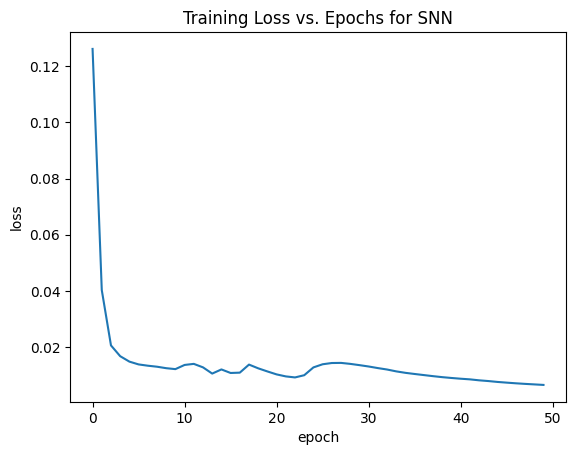

In [57]:
#X_train_sLSTM = np.transpose(X_train, (0, 2, 1))
#X_test_sLSTM = np.transpose(X_test, (0, 2, 1))
spiking_model.compile(optimizer="adam",loss=loss)
#lstm_model_epochs = spiking_lstm_model.fit(X_train_sLSTM, y_train,
#                                           epochs=epochs, batch_size=batch_size)
snn_model_epochs = spiking_model.fit(X_train, y_train,
                                           epochs=epochs, batch_size=batch_size)
plot_training_loss(snn_model_epochs, "SNN")

## Evaluate SNN using MAE, RMSE, and MAPE.

In [58]:
print("SNN Predictions for Training Set")
spiking_pred_train = spiking_model.predict(X_train)
print("SNN Predictions for Testing Set")
spiking_pred_test = spiking_model.predict(X_test)
spiking_mae = mean_absolute_error(y_test,spiking_pred_test)
print("MAE of SNN model = ", spiking_mae)
spiking_rmse =  mean_squared_error(y_test, spiking_pred_test) ** 0.5
print("RMSE of SNN model = ",spiking_mae)
#rnn_r2_score = r2_score(y_test,rnn_predictions_test)
#print("R2 Score of RNN model = ",rnn_r2_score)
spiking_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                        spiking_pred_test)
print("MAPE Score of SNN model = {0} %".
      format(spiking_mape_score))

SNN Predictions for Training Set
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
SNN Predictions for Testing Set
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE of SNN model =  0.06300592838043458
RMSE of SNN model =  0.06300592838043458
MAPE Score of SNN model = 3689313329014.8926 %


## Reverse Transform Scaler to Convert to Real Values.

In [59]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
slstm_pred_inv_train = scaler.inverse_transform(spiking_pred_train)

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
slstm_pred_inv_test = scaler.inverse_transform(spiking_pred_test)

# Get values after inverse transformation
y_train_inverse = y_train_inverse.flatten()
slstm_pred_inv_train = slstm_pred_inv_train.flatten()

y_test_inverse = y_test_inverse.flatten()
slstm_pred_inv_test = slstm_pred_inv_test.flatten()

## Show Actual and Predicted y values as Dataframes.

### With Training Dates.

In [60]:
first_6169_index_dates = df_entire.index[:X_train.shape[0]]
results_sLSTM_train = pd.DataFrame({"Date": first_6169_index_dates,
                                  'Actual': y_train_inverse,
                                  'Predicted': slstm_pred_inv_train})
results_sLSTM_train

,Date,Actual,Predicted
0,2004-10-01 01:00:00,13124.535187,13025.644531
1,2004-10-01 02:00:00,12948.731786,13025.644531
2,2004-10-01 03:00:00,12684.339953,13258.019531
3,2004-10-01 04:00:00,12368.443217,13258.019531
4,2004-10-01 05:00:00,12063.877560,12270.448242
...,...,...,...
97013,2015-10-27 05:00:00,12075.895370,12270.448242
97014,2015-10-27 06:00:00,11985.246742,12270.448242
97015,2015-10-27 07:00:00,11889.790989,12270.448242
97016,2015-10-27 08:00:00,11839.316185,11968.673828


### With Testing Dates.

In [61]:
last_6169_index_dates = df_entire.index[-X_test.shape[0]:]
results_sLSTM_test = pd.DataFrame({"Date":last_6169_index_dates,
                                 'Actual': y_test_inverse,
                                 'Predicted': slstm_pred_inv_test})
results_sLSTM_test

,Date,Actual,Predicted
0,2015-10-28 06:00:00,12142.851744,12270.448242
1,2015-10-28 07:00:00,12577.896488,13258.019531
2,2015-10-28 08:00:00,12849.155641,13025.644531
3,2015-10-28 09:00:00,12862.203550,13025.644531
4,2015-10-28 10:00:00,12838.511295,13025.644531
...,...,...,...
24230,2018-08-02 20:00:00,13922.517811,14097.807617
24231,2018-08-02 21:00:00,13795.472384,13025.644531
24232,2018-08-02 22:00:00,13691.775847,13258.019531
24233,2018-08-02 23:00:00,13335.705287,13258.019531


## Plotting Predictions for AEP_MW made by Spiking Model.

### Only Testing Data

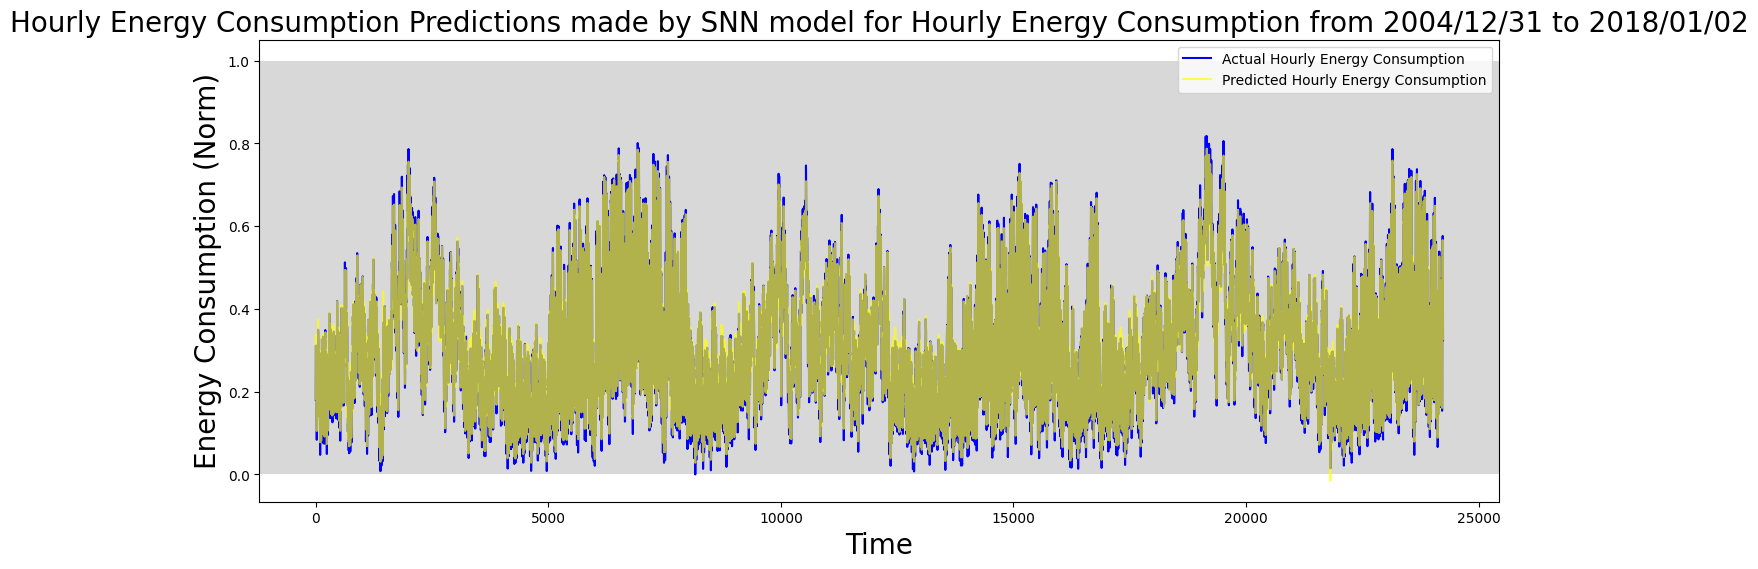

In [62]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue',label='Actual {0}'.format(feature))
plt.plot(lstm_predictions_test, alpha=0.7, color='yellow',
         label='Predicted {0}'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by SNN model for {1}".
          format(feature, title_name), fontsize = 20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

### Testing and Training Data Combined.

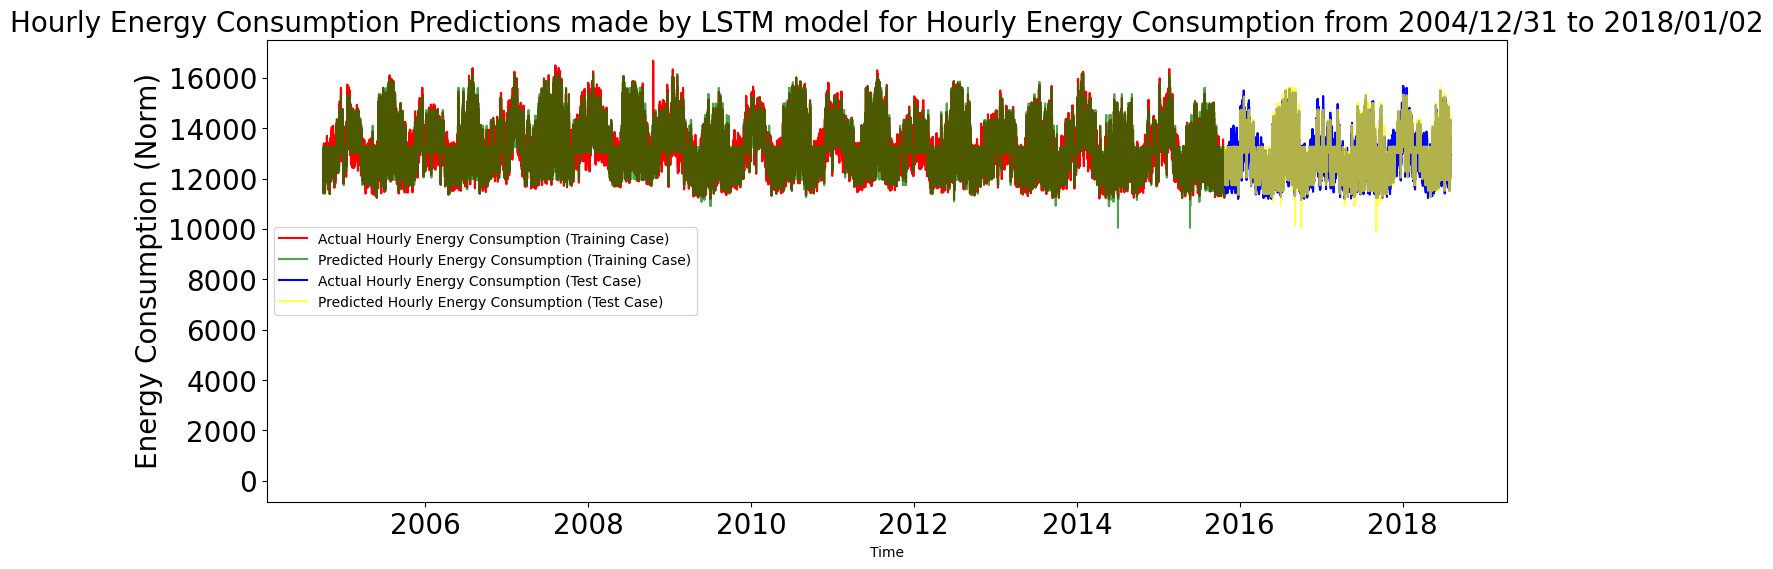

In [63]:
plt.figure(figsize=(16,6))
plt.plot(results_sLSTM_train['Date'], results_sLSTM_train['Actual'], color='red',
         label='Actual {0} (Training Case)'.format(feature))
plt.plot(results_sLSTM_train['Date'], results_sLSTM_train['Predicted'], alpha=0.7,
         color='green', label='Predicted {0} (Training Case)'.format(feature))
plt.plot(results_sLSTM_test['Date'], results_sLSTM_test['Actual'], color='blue',
         label='Actual {0} (Test Case)'.format(feature))
plt.plot(results_sLSTM_test['Date'], results_sLSTM_test['Predicted'], alpha=0.7,
         color='yellow', label='Predicted {0} (Test Case)'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.xlabel('Time', fontsize = 10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

## Combine Actual and Predicted Results for Train and Test Cases for SNN.

In [64]:
results_sLSTM = [results_sLSTM_train, results_sLSTM_test]
results_sLSTM = pd.concat(results_sLSTM)
display(results_sLSTM)

,Date,Actual,Predicted
0,2004-10-01 01:00:00,13124.535187,13025.644531
1,2004-10-01 02:00:00,12948.731786,13025.644531
2,2004-10-01 03:00:00,12684.339953,13258.019531
3,2004-10-01 04:00:00,12368.443217,13258.019531
4,2004-10-01 05:00:00,12063.877560,12270.448242
...,...,...,...
24230,2018-08-02 20:00:00,13922.517811,14097.807617
24231,2018-08-02 21:00:00,13795.472384,13025.644531
24232,2018-08-02 22:00:00,13691.775847,13258.019531
24233,2018-08-02 23:00:00,13335.705287,13258.019531


## Plot Output Spikes

Code taken from https://r-gaurav.github.io/2021/03/07/Spiking-Neural-Nets-for-Image-Classification-in-Nengo-DL.html.

In [65]:
def check_output(seq_model, X_train, X_test, y_train, y_test, modify_dt=0.01):
    """
    This code is used to show the plot of the output spikes
    """

    # repeat the outputs for n_steps
    n_steps = 50
    train_sequences = np.tile(X_train[:, None], (1, n_steps, 1, 1))
    test_sequences = np.tile(X_test[:, None], (1, n_steps, 1, 1))

    # rebuild the model with the functional API to access the output of
    # intermediate layers.
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)
    has_global_average_pooling = False
    # Obtain list of layers. Want to create a spike matrix.
    spikes_dict = {}
    layer_names = []
    print("length of seq_model.layers: ", len(seq_model.layers))
    for layer in seq_model.layers:
        print("layer name: ", layer.name)
        print("layer type: ", type(layer))
        layer_names.append(str(layer.name))
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation,
                              keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # return the full time series for visualization
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    # Initialize spikes_dict with layer names as keys
    for layer_name in layer_names:
        spikes_dict[layer_name] = np.array([]) # Initialize as empty array

    layer_names.append("Output")
    spikes_dict["Output"] = np.array([])

    # Take a look at Spiking Activation Layer.
    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)
    spikes = np.transpose(spikes, (0, 2, 1))
    print("spikes.shape: ", spikes.shape)

    # Iterate through layer list
    for i in range(spikes.shape[0]):
      for j in range(len(layer_names)):
        # Append spike data for each layer, handling potential empty arrays
        if spikes_dict[layer_names[j]].size == 0:
            spikes_dict[layer_names[j]] = spikes[i][j]
        else:
            spikes_dict[layer_names[j]] = np.concatenate((spikes_dict[layer_names[j]],
                                                    spikes[i][j]), axis = 0)

    print("spikes_dict: ", spikes_dict)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)

    print("spike_layer.dt: ", spike_layer.dt)
    # Evaluate Test Data
    seq_model_mae = mean_absolute_error(y_test, snn_pred_test)
    print("MAE of seq_model = ", seq_model_mae)
    seq_model_rmse = mean_absolute_error(y_test, snn_pred_test)**0.5
    print("RMSE of seq_model = ", seq_model_rmse)
    seq_model_mape = 100*mean_absolute_percentage_error(y_test, snn_pred_test)
    print("MAPE of seq_model = ", seq_model_mape)

    # Start Output Spike Plot.
    num_neurons = 50
    print("spikes for spiking_activation: ", spikes_dict['spiking_activation'])
    spikes_matrix = spikes_dict['spiking_activation']*20*modify_dt
    print("spikes_matrix.shape: ", spikes_matrix.shape)
    spikes_matrix = spikes_matrix.reshape(spikes.shape[0], n_steps)
    print("spikes_matrix.shape: ", spikes_matrix.shape)
    neurons = np.random.choice(spikes_matrix.shape[1], num_neurons, replace=True)
    print("neurons: ", neurons)
    print("neurons.shape: ", neurons.shape)

    fig, ax = plt.subplots(figsize=(14, 12), facecolor="#00FFFF")
    color = cm.get_cmap('tab10')(0)
    timesteps = np.arange(n_steps)
    print("timesteps shape: ", timesteps.shape)
    print("timesteps: {0}".format(timesteps))

    # Change here: iterate over the correct range of columns
    for neuron_index in range(spikes_matrix.shape[1]):
        indices = np.where(spikes_matrix[:, neuron_index] != 0)[0]
        # Get indices for non-zero elements along axis 0
        print("list of indices: ", indices)

        # Filter indices to be within the bounds of timesteps
        valid_indices = indices[indices < len(timesteps)]

        for t in timesteps[valid_indices]:
            # Use the current neuron_index for the y-axis position
            ax.plot([t, t], [neuron_index + 0.5, neuron_index + 1.5], color=color)


    ax.set_ylim(0.5, num_neurons+0.5)
    ax.set_yticks(list(range(1, num_neurons+1, int(np.ceil(num_neurons/50)))))
    ax.set_xticks(list(range(1, n_steps+1, 10)))
    ax.set_ylabel("Neuron Index")
    ax.set_xlabel("Time ($ms$) or Spikes")
    ax.set_title("Spikes Plot: Dense Spiking Activation Layer")

In [66]:
#check_output(spiking_model, X_train, X_test, y_train, y_test)

In [67]:
#check_output(spiking_model, X_train, X_test, y_train, y_test, modify_dt=100)

## Plotting Residuals for Actual and Predicted Results for SNN.

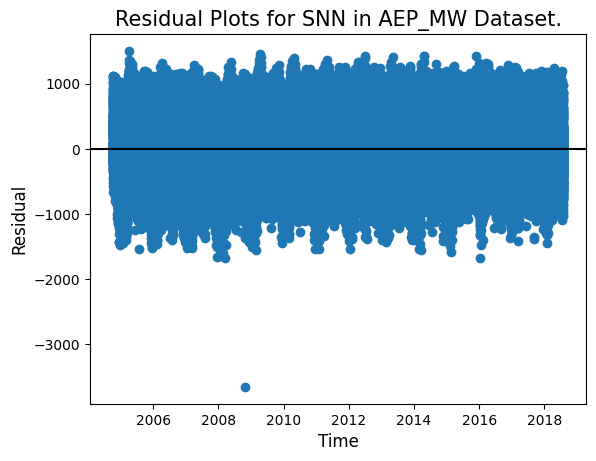

In [68]:
actual_arr_sLSTM = np.array(results_sLSTM['Actual'])
predicted_arr_sLSTM = np.array(results_sLSTM['Predicted'])
residuals_sLSTM = predicted_arr_sLSTM - actual_arr_sLSTM
plt.scatter(results_sLSTM['Date'], residuals_sLSTM)
plt.axhline(y=0, color = 'black')
plt.title("Residual Plots for SNN in AEP_MW Dataset.",
          fontsize = 15)
#plt.locator_params(axis='x', nbins=10)
#plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Residual", fontsize = 12)
plt.show()

# CNN-LSTM (Hybrid DNN Model)

## Create CNN-LSTM Model.

In [69]:
cnn_lstm_model = Sequential()

#cnn_lstm_model.add(Conv1D(filters=6, kernel_size=5, activation='tanh',
#                          input_shape=(seq_len, X_train.shape[2])))
cnn_lstm_model.add(Conv1D(filters=32, kernel_size=5, activation='tanh',
                          input_shape=(100, X_train.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

#cnn_lstm_model.add(Conv1D(filters=6, kernel_size=5, activation='tanh',
#                          input_shape=(seq_len, X_train.shape[2])))
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=5, activation='tanh',
                          input_shape=(100, X_train.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

#cnn_lstm_model.add(Conv1D(filters=60, kernel_size=2, activation='tanh',
#input_shape=(seq_len, X_train.shape[2])))
#cnn_lstm_model.add(MaxPooling1D(pool_size=2))

#cnn_lstm_model.add(LSTM(60,activation="tanh",return_sequences=True,
#input_shape=(X_train.shape[1],1)))
#cnn_lstm_model.add(Dropout(0.5))

#cnn_lstm_model.add(LSTM(64,activation="tanh",return_sequences=True))
#cnn_lstm_model.add(Dropout(0.8))

#cnn_lstm_model.add(LSTM(64,activation="sigmoid",return_sequences=True))
#cnn_lstm_model.add(Dropout(0.8))

cnn_lstm_model.add(LSTM(32,activation="tanh",return_sequences=False))
cnn_lstm_model.add(Dropout(0.1))

cnn_lstm_model.add(Dense(1))
cnn_lstm_model.compile(optimizer='adam', loss='mse')
cnn_lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 96, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 44, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,945 (89.63 KB)

 Trainable params: 22,945 (89.63 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN-LSTM Model.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0339
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0087
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0044
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0020
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0017
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0016
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0015
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0014
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0014
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0014
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0011
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0011
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0011
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 9.8773e-04
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 9.3094e

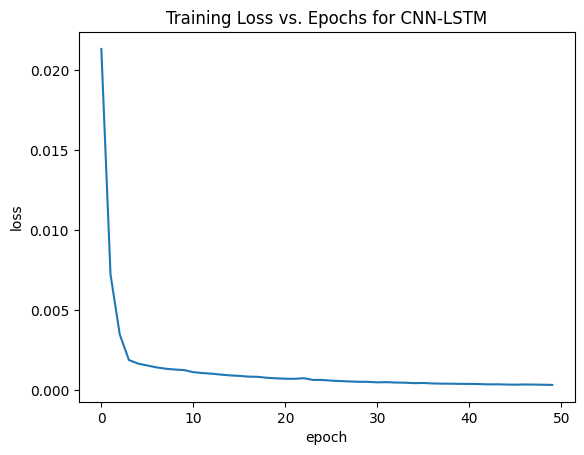

In [70]:
cnn_lstm_model.compile(optimizer="adam",loss=loss)
cnn_lstm_epochs = cnn_lstm_model.fit(X_train, y_train, epochs=epochs,
                                     batch_size=batch_size)
plot_training_loss(cnn_lstm_epochs, "CNN-LSTM")

## Evaluate CNN-LSTM Model using MAE, RMSE, R2, and MAPE.

In [71]:
print("CNN-LSTM Predictions for Training Set")
cnn_lstm_pred_train = cnn_lstm_model.predict(X_train)
print("CNN-LSTM Predictions for Testing Set")
cnn_lstm_pred_test = cnn_lstm_model.predict(X_test)
cnn_lstm_mae = mean_absolute_error(y_test,cnn_lstm_pred_test)
print("MAE of CNN-LSTM model = ",cnn_lstm_mae)
cnn_lstm_rmse =  mean_squared_error(y_test,cnn_lstm_pred_test) ** 0.5
print("RMSE of CNN-LSTM model = ",cnn_lstm_rmse)
cnn_lstm_r2_score = r2_score(y_test, cnn_lstm_pred_test)
print("R^2 Score of CNN-LSTM model = ",cnn_lstm_r2_score)
cnn_lstm_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                         cnn_lstm_pred_test)
print("MAPE Score of CNN-LSTM model = {0} %".format(cnn_lstm_mape_score))

CNN-LSTM Predictions for Training Set
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
CNN-LSTM Predictions for Testing Set
758/758 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MAE of CNN-LSTM model =  0.011021518838536755
RMSE of CNN-LSTM model =  0.014626660653932647
R^2 Score of CNN-LSTM model =  0.9907073567919924
MAPE Score of CNN-LSTM model = 172733536180.64133 %


## Reverse Transform Scaler to Convert to Real Values.

In [72]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
cnn_lstm_pred_inv_train = scaler.inverse_transform(cnn_lstm_pred_train)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
cnn_lstm_pred_inv_test = scaler.inverse_transform(cnn_lstm_pred_test)

# Get values after inverse transformation.
y_train_inverse = y_train_inverse.flatten()
cnn_lstm_pred_inv_train = cnn_lstm_pred_inv_train.flatten()
y_test_inverse = y_test_inverse.flatten()
cnn_lstm_pred_inv_test = cnn_lstm_pred_inv_test.flatten()

## Showing Actual y and Predicted y values as Dataframes.

In [73]:
results_CNN_LSTM_train = pd.DataFrame({"Date":first_6169_index_dates,
                                 'Actual': y_train_inverse,
                                 'Predicted': cnn_lstm_pred_inv_train})
results_CNN_LSTM_train

,Date,Actual,Predicted
0,2004-10-01 01:00:00,13124.535187,12937.662109
1,2004-10-01 02:00:00,12948.731786,12909.686523
2,2004-10-01 03:00:00,12684.339953,12625.353516
3,2004-10-01 04:00:00,12368.443217,12332.962891
4,2004-10-01 05:00:00,12063.877560,12088.701172
...,...,...,...
97013,2015-10-27 05:00:00,12075.895370,12054.721680
97014,2015-10-27 06:00:00,11985.246742,11964.504883
97015,2015-10-27 07:00:00,11889.790989,11906.886719
97016,2015-10-27 08:00:00,11839.316185,11893.158203


In [74]:
# Now let's see our actual y and predicted y values as dataframes
results_CNN_LSTM_test = pd.DataFrame({"Date":last_6169_index_dates,
                                 'Actual': y_test_inverse,
                                 'Predicted': cnn_lstm_pred_inv_test})
results_CNN_LSTM_test

,Date,Actual,Predicted
0,2015-10-28 06:00:00,12142.851744,12191.425781
1,2015-10-28 07:00:00,12577.896488,12453.868164
2,2015-10-28 08:00:00,12849.155641,12787.422852
3,2015-10-28 09:00:00,12862.203550,12939.516602
4,2015-10-28 10:00:00,12838.511295,12844.430664
...,...,...,...
24230,2018-08-02 20:00:00,13922.517811,13843.640625
24231,2018-08-02 21:00:00,13795.472384,13735.860352
24232,2018-08-02 22:00:00,13691.775847,13551.024414
24233,2018-08-02 23:00:00,13335.705287,13359.647461


## Plotting Predictions for AEP_MW made by CNN-LSTM Model.

### Only Testing Data.

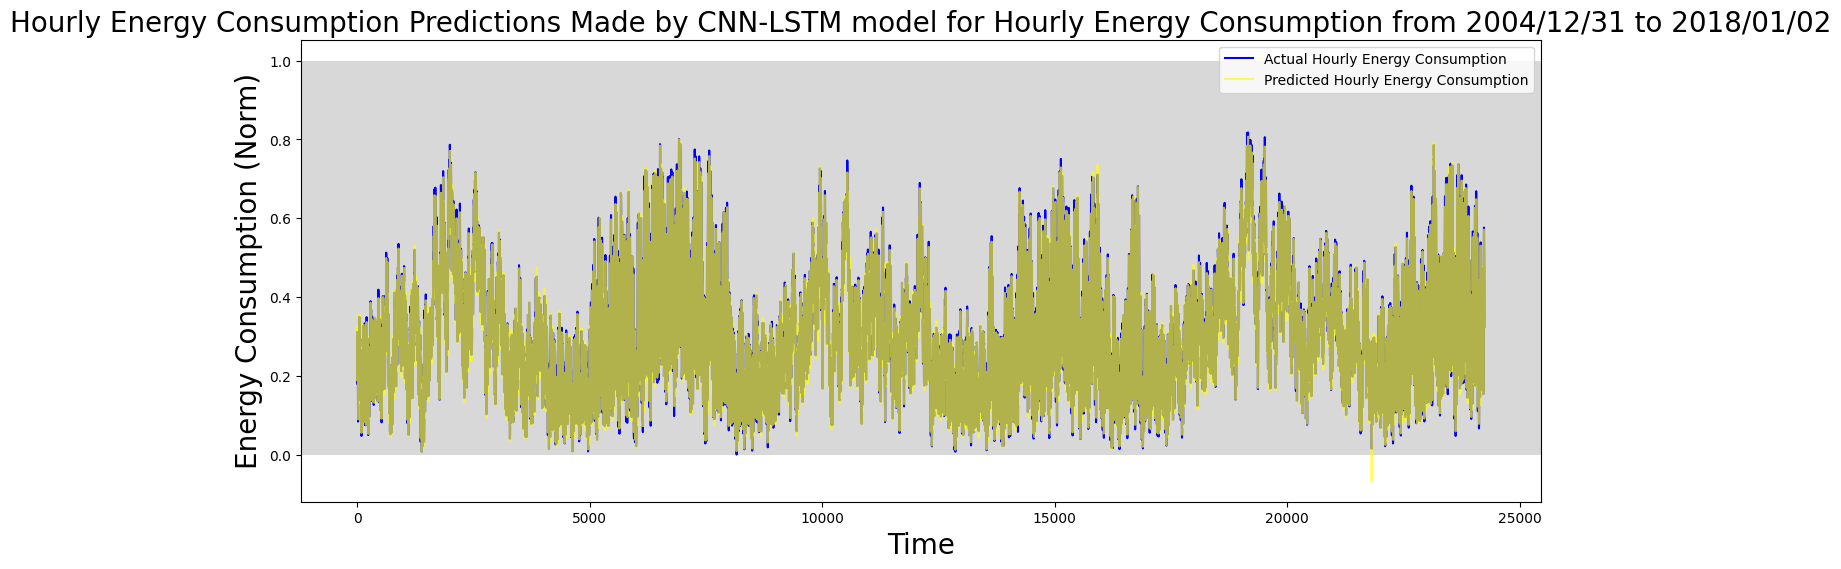

In [75]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue',label='Actual {0}'.format(feature))
plt.plot(cnn_lstm_pred_test, alpha=0.7, color='yellow', \
         label='Predicted {0}'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions Made by CNN-LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

### Only Training Data.

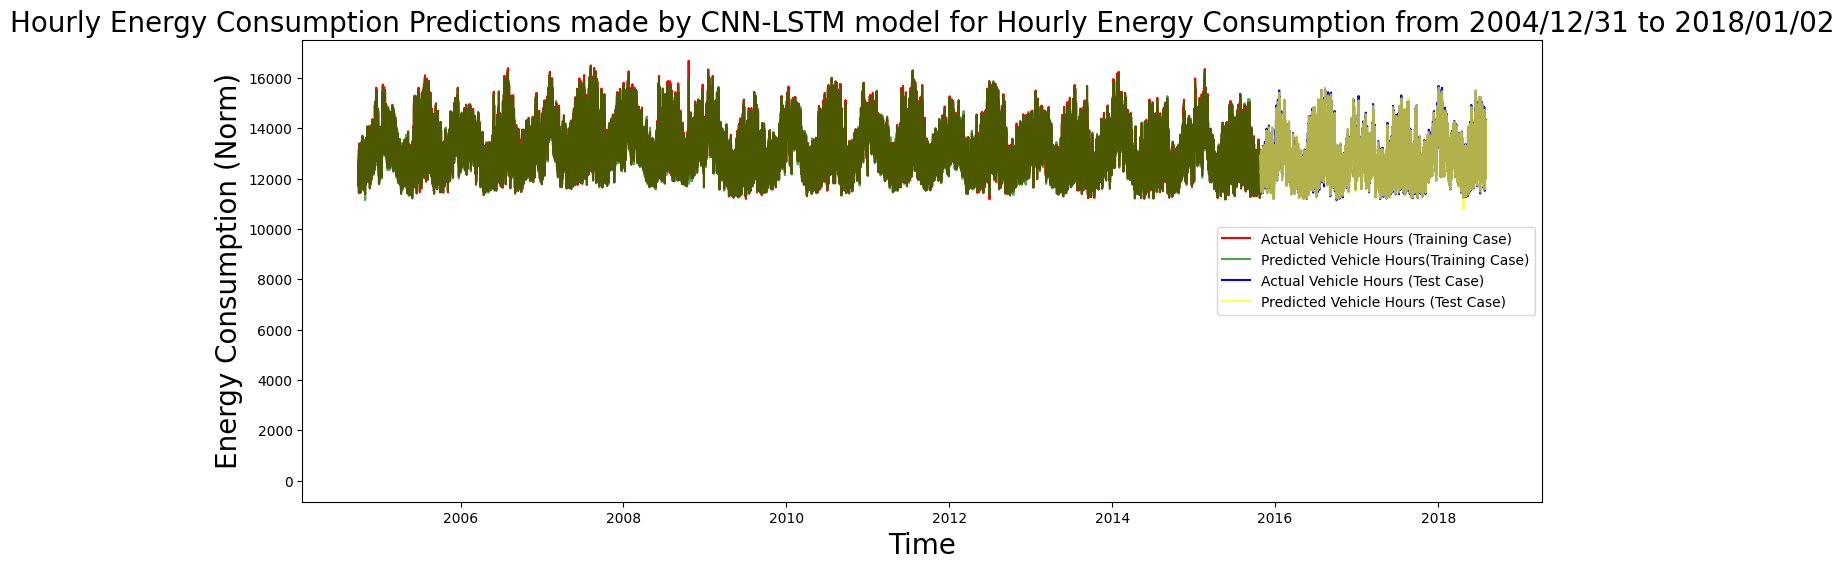

In [76]:
plt.figure(figsize=(16,6))
plt.plot(results_CNN_LSTM_train['Date'], results_CNN_LSTM_train['Actual'], color='red',
         label='Actual Vehicle Hours (Training Case)')
plt.plot(results_CNN_LSTM_train['Date'],  results_CNN_LSTM_train['Predicted'], alpha=0.7,
         color='green', label='Predicted Vehicle Hours(Training Case)')
plt.plot(results_CNN_LSTM_test['Date'], results_CNN_LSTM_test['Actual'], color='blue',
         label='Actual Vehicle Hours (Test Case)')
plt.plot(results_CNN_LSTM_test['Date'], results_CNN_LSTM_test['Predicted'], alpha=0.7, color='yellow',
         label='Predicted Vehicle Hours (Test Case)')
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by CNN-LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

## Combine Actual and Predicted Results for Train and Test Cases for CNN-LSTM.

In [77]:
results_CNN_LSTM = [results_CNN_LSTM_train, results_CNN_LSTM_test]
results_CNN_LSTM = pd.concat(results_CNN_LSTM)
display(results_CNN_LSTM)

,Date,Actual,Predicted
0,2004-10-01 01:00:00,13124.535187,12937.662109
1,2004-10-01 02:00:00,12948.731786,12909.686523
2,2004-10-01 03:00:00,12684.339953,12625.353516
3,2004-10-01 04:00:00,12368.443217,12332.962891
4,2004-10-01 05:00:00,12063.877560,12088.701172
...,...,...,...
24230,2018-08-02 20:00:00,13922.517811,13843.640625
24231,2018-08-02 21:00:00,13795.472384,13735.860352
24232,2018-08-02 22:00:00,13691.775847,13551.024414
24233,2018-08-02 23:00:00,13335.705287,13359.647461


## Plotting Residuals for Actual and Predicted Results for CNN-LSTM.

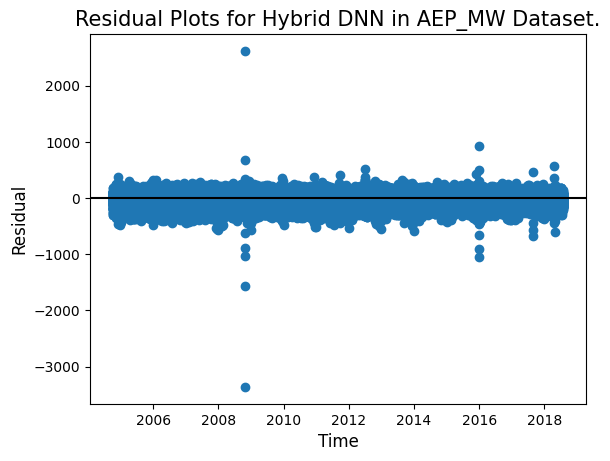

In [78]:
actual_arr_CNN_LSTM = np.array(results_CNN_LSTM['Actual'])
predicted_arr_CNN_LSTM = np.array(results_CNN_LSTM['Predicted'])
residuals_CNN_LSTM = predicted_arr_CNN_LSTM - actual_arr_CNN_LSTM
plt.scatter(results_CNN_LSTM['Date'], residuals_CNN_LSTM)
plt.axhline(y=0, color = 'black')
plt.title("Residual Plots for Hybrid DNN in AEP_MW Dataset.",
          fontsize = 15)
#plt.locator_params(axis='x', nbins=10)
#plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Residual", fontsize = 12)
plt.show()

# Spiking Network Model with LIF (Version 4)

## Create New SNN and LIF Class

### Create SpikingActivation Class.

Due to the depreciation of keras_spiking.SpikingActivation, a custom SpikingActivation class is provided below prior to creating the model.

In [79]:
#import typeguard

#@typeguard.typechecked
class SpikingActivation(tf.keras.layers.Layer):
    def __init__(self, activation=tf.keras.activations.tanh, dt=1.0, spiking_aware_training=True, **kwargs):
        super(SpikingActivation, self).__init__(**kwargs)
        # Enforce activation to be callable using assert
        assert callable(activation), "Activation must be a callable function."
        self.activation = activation  # The underlying activation function (e.g., 'tanh')
        self.dt = dt
        self.spiking_aware_training = spiking_aware_training

    def call(self, inputs, training=None):
        # Apply the activation function
        activated_inputs = self.activation(inputs)

        # Simulate spiking behavior (using a threshold-based approach)
        spikes = tf.cast(activated_inputs >= 0, dtype=tf.float32)

        # Apply dt scaling if needed
        spikes = spikes * self.dt

        # During training, if spiking_aware_training is True,
        # you might want to use a surrogate gradient for backpropagation
        #if self.spiking_aware_training and tf.keras.backend.learning_phase():
            # Example: Using a straight-through estimator
            #return tf.stop_gradient(spikes - activated_inputs) + activated_inputs
        if self.spiking_aware_training and training:
            # Example: Using a straight-through estimator
            return tf.stop_gradient(spikes - activated_inputs) + activated_inputs
        else:
            return spikes

    def compute_output_shape(self, input_shape):
        # The output shape is the same as the input shape
        return input_shape

    # Optionally implement get_config for serialization
    def get_config(self):
        config = super(SpikingActivation, self).get_config()
        config.update({
            'activation': self.activation,
            'dt': self.dt,
            'spiking_aware_training': self.spiking_aware_training
        })
        return config

    @classmethod
    def from_config(cls, config):
        config['activation'] = tf.keras.activations.deserialize(config['activation'])  # Deserialize activation
        return cls(**config)

### New LIF Class using Refractory Period

In [80]:
class LIFNeuronV3(tf.keras.layers.Layer):
  def __init__(self, threshold=1.0, leak_rate=0.05, refractory_period=5, **kwargs):
      super(LIFNeuronV3 , self).__init__(**kwargs)
      self.threshold = threshold
      self.leak_rate = leak_rate
      self.refractory_period = refractory_period
      self.membrane_potential = None
      self.return_sequences = True # Flag to return output sequence

  def build(self, input_shape):
    self.num_neurons = input_shape[-1]  # Store the number of neurons
    self.membrane_potential = self.add_weight(
          name='membrane_potential',
          #shape=(input_shape[0], input_shape[-1]),
          #shape=(None, self.num_neurons),
          #shape=(input_shape[1], input_shape[-1]),
          #shape=(seq_len, num_features),  # Use Python integers
          shape=(1, self.num_neurons),
          initializer='zeros',
          trainable=False

      )

    self.refractory_counter = self.add_weight(
            name='refractory_counter',
            shape = (),
            #shape=(self.num_neurons,),
            #shape=(1, self.num_neurons),
            initializer='zeros',
            trainable=False,
            dtype=tf.int32  # Ensure refractory_counter is an integer type
        )


  def call(self, inputs):
      input_shape = tf.shape(inputs)
      inputs = tf.reshape(inputs, (input_shape[0], input_shape[1], input_shape[2]))

      # Replace for loop with tf.while_loop
      def while_body(t, sample_outputs_ta, membrane_potential, refractory_counter, sample):
          current_input = tf.gather(sample, t, axis=0)  # Get input at time step t
          membrane_potential = membrane_potential * (1 - self.leak_rate) + current_input

          # Check refractory period
          spikes = tf.cond(
              refractory_counter > 0,
              lambda: tf.zeros_like(membrane_potential),
              lambda: tf.cast(membrane_potential >= self.threshold, dtype=tf.float32)
          )

          # Reset potential and update refractory counter
          reset_condition = tf.reduce_any(spikes > 0)
          membrane_potential = tf.cond(reset_condition,
                                      lambda: membrane_potential * (1 - spikes),
                                      lambda: membrane_potential)

          refractory_counter = tf.cond(reset_condition,
                                      #lambda: self.refractory_period,
                                      lambda: tf.constant(self.refractory_period, dtype=tf.int32),
                                      lambda: tf.maximum(0, refractory_counter - 1))

          # Reshape spikes before writing to TensorArray
          spikes = tf.reshape(spikes, (1, self.num_neurons))  # Shape as (1, num_neurons)
          sample_outputs_ta = sample_outputs_ta.write(t, spikes)

          return tf.add(t, 1), sample_outputs_ta, membrane_potential, refractory_counter, sample

      # Initialize loop variables
      t = tf.constant(0)
      max_time_steps = input_shape[1]

      # Execute the loop for each sample in the batch using tf.map_fn
      def process_sample(sample):
          # Initialize TensorArray inside process_sample
          sample_outputs_ta = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)

          _, sample_outputs_ta, _, _, _ = tf.while_loop(
              lambda t, *_: tf.less(t, max_time_steps),
              while_body,
              [t, sample_outputs_ta, self.membrane_potential, self.refractory_counter, sample]
          )
          sample_outputs = sample_outputs_ta.stack()
          return sample_outputs

      # Use tf.map_fn to process each sample in the batch
      outputs = tf.map_fn(process_sample, inputs, dtype=tf.float32)

      return outputs

### Create Model

In [81]:
spiking_LIFv3_model = tf.keras.Sequential(
    [
        # Add temporal dimension to model. For this dataset, the input_shape is
        # passed into the model.
        tf.keras.layers.Reshape((-1, X_train.shape[1]),
                                input_shape=(None, X_train.shape[1])),
        # Keras' TimeDistributed wrapper allows Dense layer to operate on
        # temporal data.
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        #tf.keras.layers.Dense(64, activation='tanh'),
        #LIFNeuronV3(threshold=1.25, leak_rate=0.06, refractory_period=5),
        #tf.keras.layers.Activation('tanh'),  # Non-linearity before LIF
        LIFNeuronV3(threshold=0.5, leak_rate=0.01, refractory_period=500),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Reshape((-1, 128)),  # Reshape to (batch_size, time_steps, features)

        #tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64)),
        #tf.keras.layers.Activation('tanh'),  # Non-linearity before LIF
        #LIFNeuronV3(threshold=0.5, leak_rate=0.01, refractory_period=5),


        #tf.keras.layers.Dropout(0.01),  # Added dropout
        # Use tf.keras.layers.Permute to swap the time_steps and num_neurons dimensions
        #tf.keras.layers.Permute((2, 1)),  # Now shape is (batch_size, num_neurons, time_steps)
        #tf.keras.layers.Reshape((-1, 64)),  # Reshape to (batch_size, time_steps, num_neurons)
        # GlobalAveragePooling1D: Averages spiking output over time. Used for
        # determining the spiking rate of neuron.
        #keras_spiking.SpikingActivation("tanh", dt = 100,
        #                                spiking_aware_training=True),
        SpikingActivation(activation=tf.keras.activations.tanh, dt = 100,
                          spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        #tf.keras.layers.GlobalAveragePooling1D(data_format='channels_last'),
        #tf.keras.layers.Dense(future),
        #tf.keras.layers.Flatten(),  # Add Flatten layer
        #tf.keras.layers.Reshape((batch_size, 1)),  # Reshape to (batch_size, 1)
        #tf.keras.layers.Lambda(lambda x: x[:, -1]),
        tf.keras.layers.Dense(1),
        #tf.keras.layers.Dense(1, input_shape=(X_train.shape[1] * 64, )),

    ]

)

spiking_LIFv3_model.summary()

Instructions for updating:
Use fn_output_signature instead


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, None, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, None, 128)      │         2,688 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lif_neuron_v3 (LIFNeuronV3)     │ (None, None, 1, 128)   │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, None, 1, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spiking_activation              │ (None, None, 128)      │             0 │
│ (SpikingActivation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,946 (11.51 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 129 (516.00 B)

## Training SNN V4 Model.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 389ms/step - loss: 9.6355
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - loss: 0.0260
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - loss: 0.0260
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - loss: 0.0278
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - loss: 0.0270
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - loss: 0.0265
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 349ms/step - loss: 0.0292
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - loss: 0.0284
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 354ms/step - loss: 0.0339
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - loss: 0.0377
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 370ms/step - loss: 0.0278
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 350ms/step - loss: 0.0301
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - loss: 0.0314
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - loss: 0.1648
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 

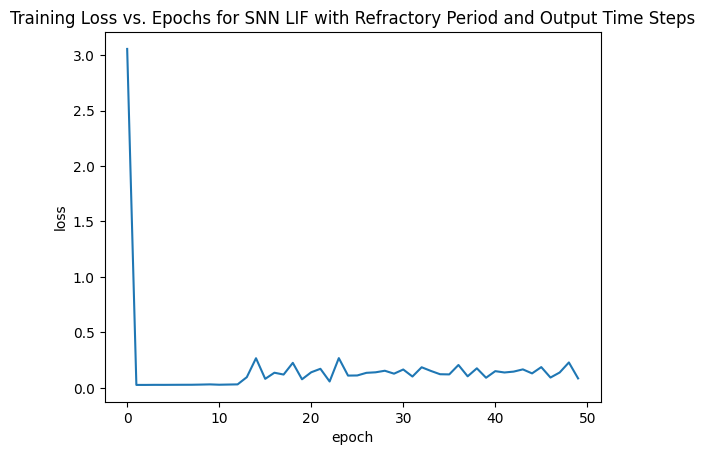

In [82]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
spiking_LIFv3_model.compile(optimizer='adam', loss=loss)
spiking_LIFv3_model.compile(optimizer=optimizer, loss=loss)
spiking_LIFv3_model_epochs = spiking_LIFv3_model.fit(X_train,y_train,epochs=epochs,
                                                 batch_size=batch_size)
plot_training_loss(spiking_LIFv3_model_epochs, "SNN LIF with Refractory Period and Output Time Steps")

## Evaluating SNN V4 Model using MAE, RMSE, R2, and MAPE.

In [83]:
print("SNN v4 Predictions for Training Set")
spiking_LIFv3_model_pred_train = spiking_LIFv3_model.predict(X_train)
print("SNN v4 Predictions for Training Set")
spiking_LIFv3_model_pred_test = spiking_LIFv3_model.predict(X_test)
print(spiking_LIFv3_model_pred_test.shape)

# Reshape the model predictions if necessary
#spiking_LIFv3_model_pred_test = spiking_LIFv3_model_pred_test.reshape(y_test.shape)

spiking_LIFv3_model_mae = mean_absolute_error(y_test, spiking_LIFv3_model_pred_test)
print("MAE of SNN v4 model = ",spiking_LIFv3_model_mae)
spiking_LIFv3_model_rmse =  mean_squared_error(y_test, spiking_LIFv3_model_pred_test) ** 0.5
print("RMSE of SNN v4  model = ", spiking_LIFv3_model_rmse)
spiking_LIFv3_model_r2_score = r2_score(y_test, spiking_LIFv3_model_pred_test)
print("R2 Score of SNN v4 model = ", spiking_LIFv3_model_r2_score)
spiking_LIFv3_model_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                                    spiking_LIFv3_model_pred_test)
print("MAPE Score of SNN v4 model = {0} %".format(spiking_LIFv3_model_mape_score))

SNN v4 Predictions for Training Set
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step
SNN v4 Predictions for Training Set
758/758 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
(24235, 1)
MAE of SNN v4 model =  0.13654214233344059
RMSE of SNN v4  model =  0.1637158885527777
R2 Score of SNN v4 model =  -0.1642079227821951
MAPE Score of SNN v4 model = 7065038442152.144 %


# Forecasting Future Data for all models

## Essential Functions.

In [84]:
# this section for unknown future.
#future=20
future=seq_len
forecast_LSTM = []
forecast_CNN_LSTM = []
forecast_sLSTM = []
Xin = X_test[:,:,:]

In [85]:
def insert_end(Xin, new_input, timestep):
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    return Xin

def forecast_data(Xin, model_type, forecast, future_num):
    time=[]
    data_pts = future_num
    for j in range(data_pts):
      out = model_type.predict(Xin, batch_size=1000)
      forecast.append(out[j, 0])
      Xin = insert_end(Xin, out[j, 0], future_num)
      time_current = pd.to_datetime(df_norm.index[-1])+timedelta(days=30*j)
      if (j % 100 == 0):
        print("j = {0}".format(j))
        print("forecast: {0}".format(forecast))
        print("time_current: ",  time_current)
      time.append(time_current)


    forcasted_output=np.asanyarray(forecast)
    forcasted_output=forcasted_output.reshape(-1,1)
    forcasted_output = scaler.inverse_transform(forcasted_output)
    forcasted_output = pd.DataFrame(forcasted_output)
    date = pd.DataFrame(time)
    forecast_result = pd.concat([date, forcasted_output],axis=1)
    forecast_result.columns = "Date","Forecasted"

    return forecast_result

In [86]:
# Plotting Predictions and Forecast for AEP_MW.
def plot_forecast(forecast_set, model_name, mode):
    plt.figure(figsize=(16,6))
    plt.plot(forecast_set['Date'], forecast_set['Forecasted'], alpha=0.7,
             color='teal', label='Forecasted {0}'.format(feature))
    plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
    plt.title('{0} Forecast for {1} using {2}'.
              format(feature_field, mode, model_name), fontsize = 15)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    #plt.ylim([40, 70])
    plt.xlabel('Time', fontsize = 20)
    plt.ylabel(feature_field, fontsize = 20)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.legend()
    plt.show()

In [87]:
# Plotting Predictions for Vehicle Hours/Miles.
def plot_with_forecast(train_set, test_set, forecast_set, model_name, mode):
    plt.figure(figsize=(16,6))
    plt.plot(train_set['Date'], train_set['Actual'], color='red',
             label='Actual {0} (Training Case)'.format(feature))
    plt.plot(train_set['Date'], train_set['Predicted'], alpha=0.7,
             color='green',
             label='Predicted {0} (Training Case)'.format(feature))
    plt.plot(test_set['Date'], test_set['Actual'], color='blue',
            label='Actual {0} (Test Case)'.format(feature))
    plt.plot(test_set['Date'], test_set['Predicted'], alpha=0.7, color='yellow',
             label='Predicted {0} (Test Case)'.format(feature))
    plt.plot(forecast_set['Date'], forecast_set['Forecasted'], alpha=0.7,
             color='teal', label='Forecasted {0}'.format(feature))
    plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
    plt.title("Predictions and Forecasts made by {0} model for {1}".
              format(model_name, title_name), fontsize = 15)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    #plt.ylim([1052, 1054])
    plt.xlabel('Time', fontsize = 15)
    plt.ylabel('Normalized {0} Scale'.format(feature_field), fontsize = 15)
    plt.legend()
    plt.show()

## Forecasting Future Data for LSTM.

In [88]:
Xin

array([[[0.34541393],
        [0.32363162],
        [0.31879111],
        ...,
        [0.13478962],
        [0.12566712],
        [0.14205039]],

       [[0.32363162],
        [0.31879111],
        [0.31699144],
        ...,
        [0.12566712],
        [0.14205039],
        [0.18052625]],

       [[0.31879111],
        [0.31699144],
        [0.31202681],
        ...,
        [0.14205039],
        [0.18052625],
        [0.25915353]],

       ...,

       [[0.18654586],
        [0.16848703],
        [0.15377932],
        ...,
        [0.52978776],
        [0.50217202],
        [0.47921062]],

       [[0.16848703],
        [0.15377932],
        [0.16401887],
        ...,
        [0.50217202],
        [0.47921062],
        [0.46046916]],

       [[0.15377932],
        [0.16401887],
        [0.19858508],
        ...,
        [0.47921062],
        [0.46046916],
        [0.39611518]]])

In [89]:
forecast_result_lstm = forecast_data(Xin, lstm_model, forecast_LSTM, future)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
j = 0
forecast: [0.18230203]
time_current:  2018-08-03 00:00:00
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step


In [90]:
forecast_result_lstm

,Date,Forecasted
0,2018-08-03,12152.676758
1,2018-09-02,12314.367188
2,2018-10-02,12417.387695
3,2018-11-01,12447.346680
4,2018-12-01,12465.208008
5,2018-12-31,12622.224609
6,2019-01-30,12832.098633
7,2019-03-01,12961.527344
8,2019-03-31,12958.608398
9,2019-04-30,12860.954102


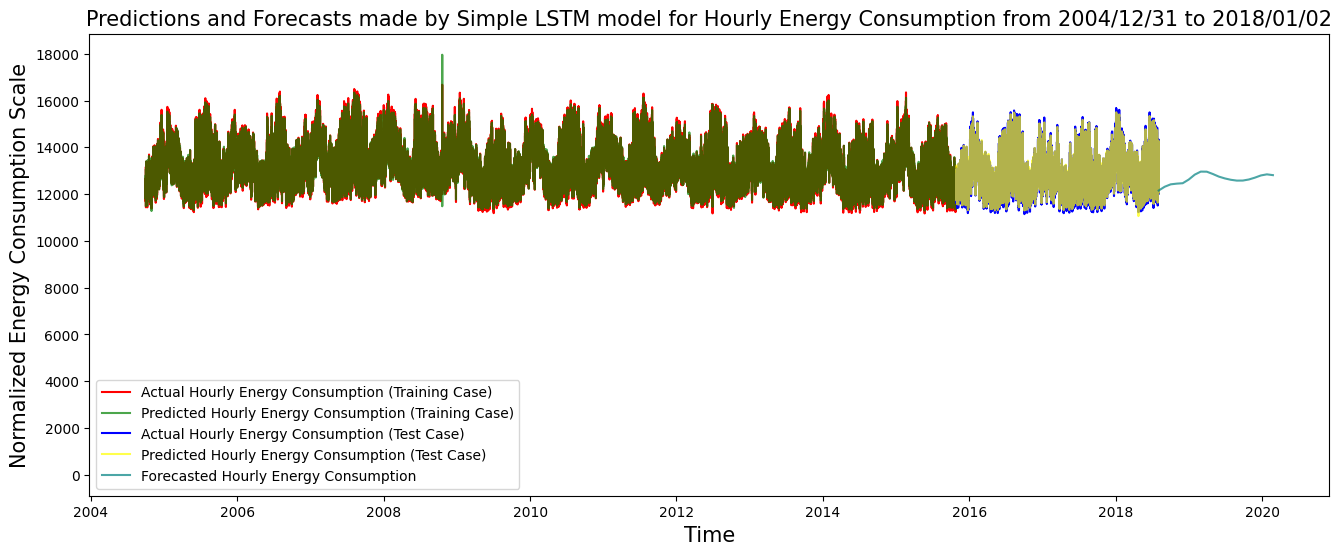

In [91]:
# Plot Forecast combined with Training and Testing Data.
plot_with_forecast(results_LSTM_train, results_LSTM_test, forecast_result_lstm,
                   'Simple LSTM', title_name)

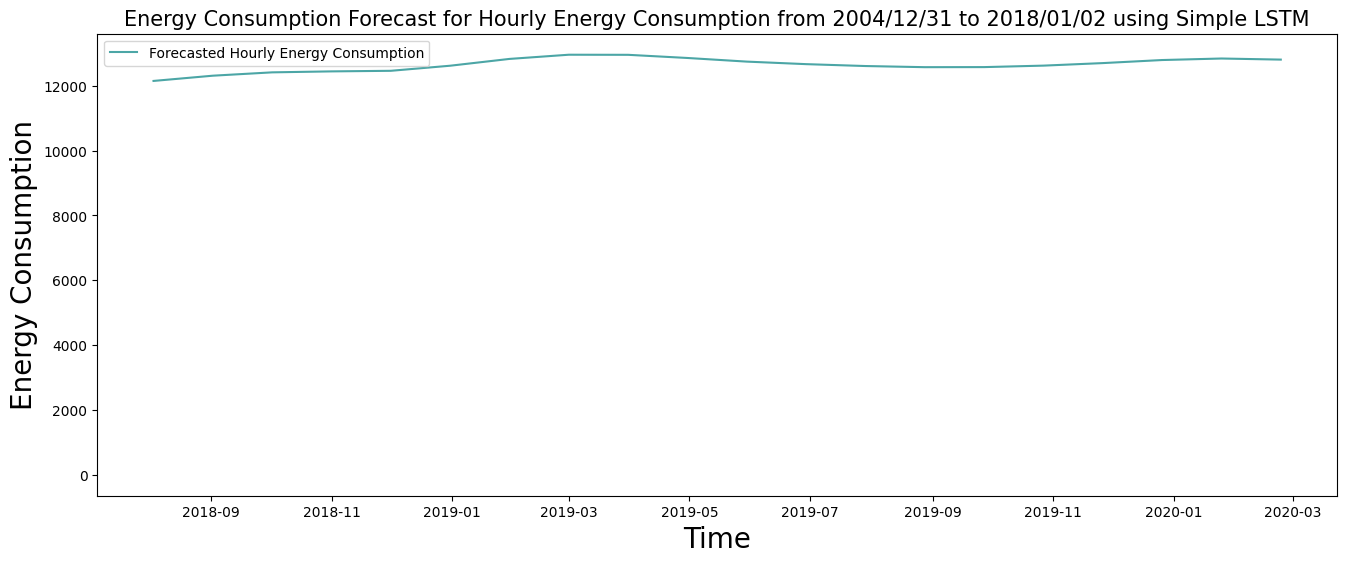

In [92]:
# Only Forecast Data for closer look.
plot_forecast(forecast_result_lstm, 'Simple LSTM', title_name)

## Forecasting Future Data for CNN-LSTM

In [93]:
forecast_result_cnn_lstm = forecast_data(Xin, cnn_lstm_model, forecast_CNN_LSTM,
                                         future)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
j = 0
forecast: [0.29030535]
time_current:  2018-08-03 00:00:00
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [94]:
forecast_result_cnn_lstm

,Date,Forecasted
0,2018-08-03,12750.259766
1,2018-09-02,12623.960938
2,2018-10-02,12483.172852
3,2018-11-01,12305.297852
4,2018-12-01,12187.514648
5,2018-12-31,12090.392578
6,2019-01-30,12050.479492
7,2019-03-01,12048.686523
8,2019-03-31,12119.110352
9,2019-04-30,12244.737305


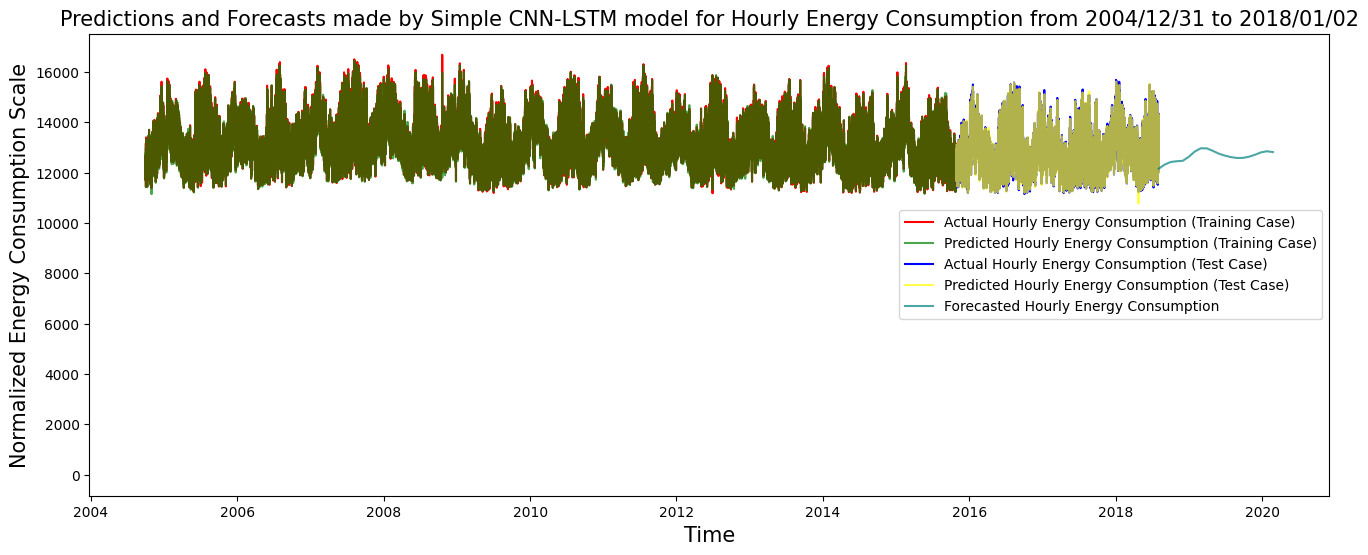

In [95]:
# Plot Forecast combined with Training and Testing Data.
plot_with_forecast(results_CNN_LSTM_train, results_CNN_LSTM_test,
                   forecast_result_lstm, 'Simple CNN-LSTM', title_name)

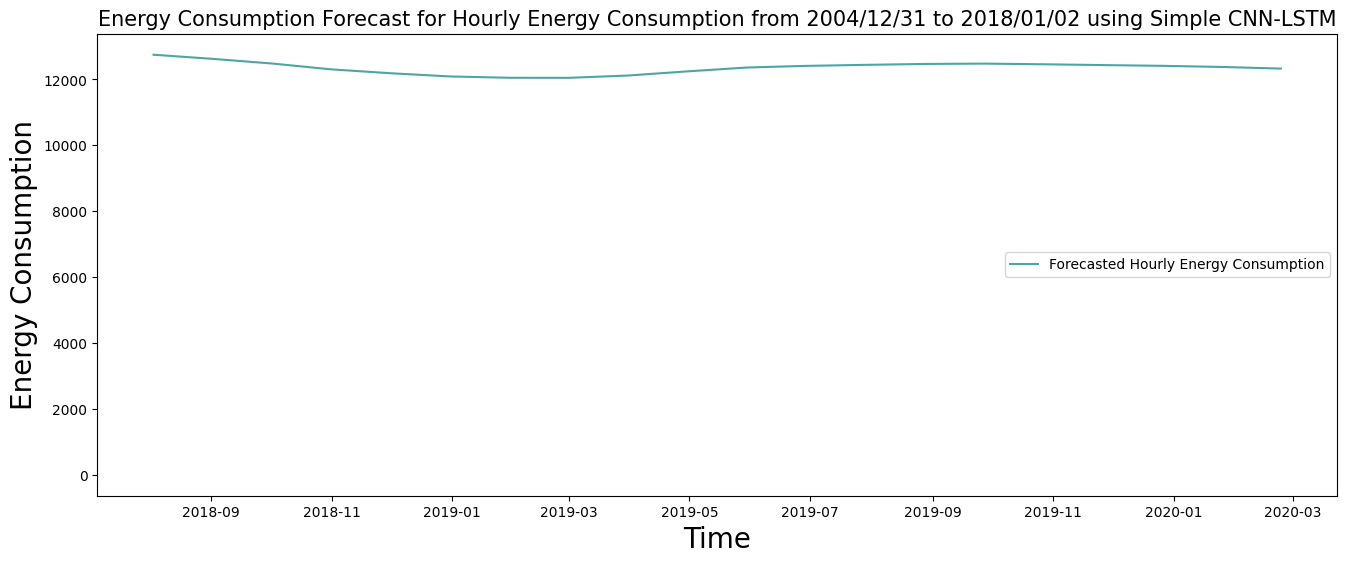

In [96]:
# Only Forecast Data for closer look.
plot_forecast(forecast_result_cnn_lstm, 'Simple CNN-LSTM', title_name)

## Forecasting Future Data for SNN.

In [97]:
forecast_result_snn = forecast_data(Xin, spiking_model,
                                      forecast_sLSTM, future)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
j = 0
forecast: [0.34007668]
time_current:  2018-08-03 00:00:00
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [98]:
forecast_result_snn

,Date,Forecasted
0,2018-08-03,13025.644531
1,2018-09-02,13025.644531
2,2018-10-02,13025.644531
3,2018-11-01,13025.644531
4,2018-12-01,13025.644531
5,2018-12-31,13025.644531
6,2019-01-30,13025.644531
7,2019-03-01,13025.644531
8,2019-03-31,13025.644531
9,2019-04-30,13025.644531


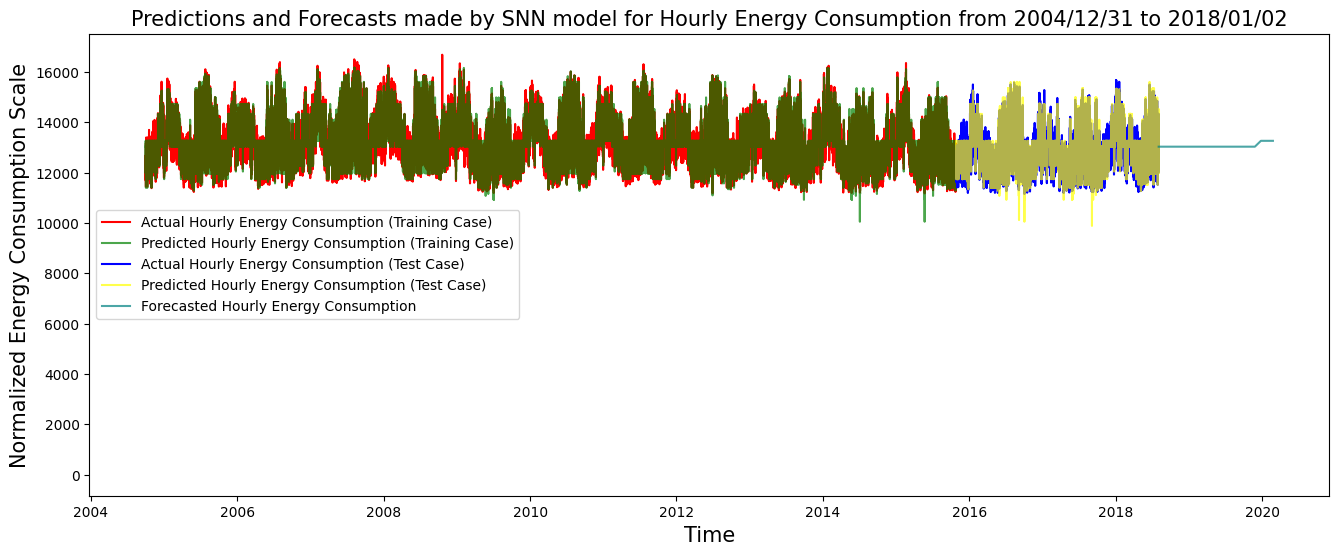

In [99]:
# Plot Forecast combined with Training and Testing Data.
plot_with_forecast(results_sLSTM_train, results_sLSTM_test,
                   forecast_result_snn, 'SNN', title_name)

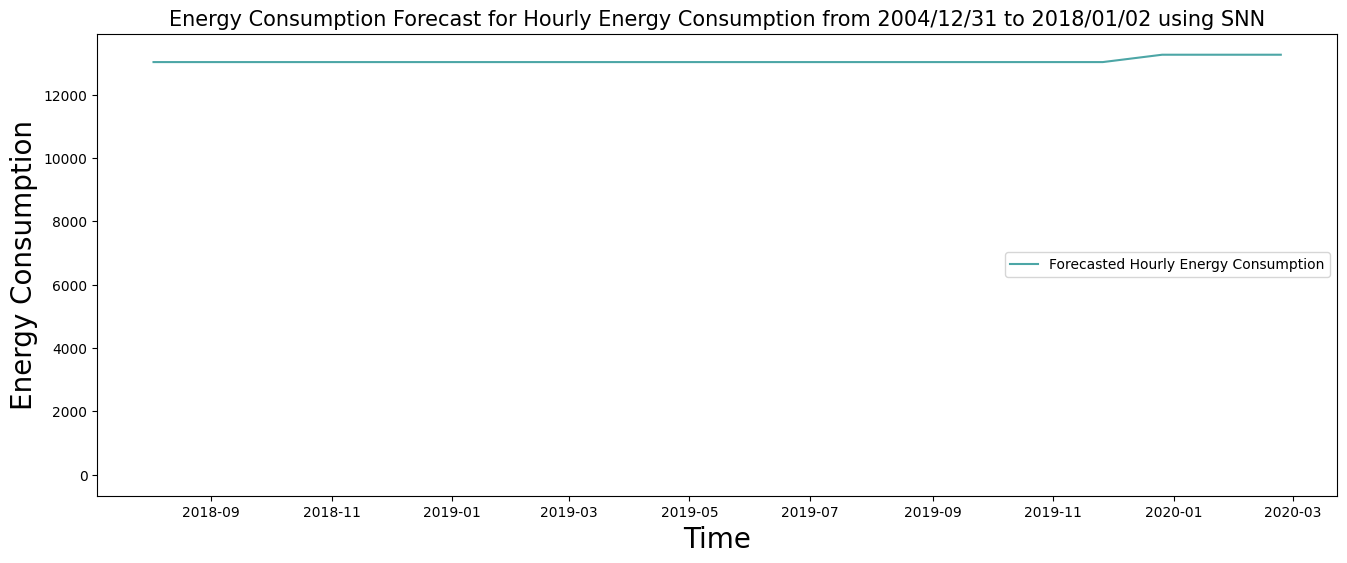

In [100]:
# Only Forecast Data for closer look.
plot_forecast(forecast_result_snn, 'SNN', title_name)

# Creating a pickle file for all classifier models.

## Mount model_pkl folder.

In [101]:
#drive.mount('/content/drive')

In [102]:
#os.chdir('/content/drive/My Drive/VT/Research/ap_datasets/model_pkl')

## Send model to pkl file.

In [103]:
#filename_lstm = 'TSC_sunset-prediction-lstm-model.pkl'
#pickle.dump(lstm_model, open(filename_lstm, 'wb'))